<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Import" data-toc-modified-id="Import-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Making-pretty-maps" data-toc-modified-id="Making-pretty-maps-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Making pretty maps</a></span><ul class="toc-item"><li><span><a href="#Layering-and-Chorlopleths" data-toc-modified-id="Layering-and-Chorlopleths-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Layering and Chorlopleths</a></span></li><li><span><a href="#Adding-annotations" data-toc-modified-id="Adding-annotations-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Adding annotations</a></span></li><li><span><a href="#Adding-points-from-Google" data-toc-modified-id="Adding-points-from-Google-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Adding points from Google</a></span></li><li><span><a href="#Plotting-a-list-of-points" data-toc-modified-id="Plotting-a-list-of-points-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Plotting a list of points</a></span></li></ul></li><li><span><a href="#Simple-GIS" data-toc-modified-id="Simple-GIS-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Simple GIS</a></span><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Merging-Geopandas" data-toc-modified-id="Merging-Geopandas-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Merging Geopandas</a></span></li></ul></li><li><span><a href="#Nifty-stuff" data-toc-modified-id="Nifty-stuff-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Nifty stuff</a></span><ul class="toc-item"><li><span><a href="#Distance-between-to-points" data-toc-modified-id="Distance-between-to-points-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Distance between to points</a></span></li><li><span><a href="#Distance-matrix" data-toc-modified-id="Distance-matrix-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Distance matrix</a></span></li></ul></li></ul></div>

In [2]:
# !conda install geopandas
# !conda install geopy

#!pip install geopandas
#!#pip install geopy

/bin/sh: conda: command not found
/bin/sh: conda: command not found


In [1]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
%config InlineBackend.figure_format = 'retina'


## Load data

For maps typically a shapefile (.shp) is used. Google search with 'shapefile' will render the correct map or data in many cases. Typically the .shp file is in an directory with other files (.prj, . cpg, .bdf): download **all**. Although in GeoPandas only the .shp file is called, under the hood the other files may be needed, e.g. for projection data.

In practice, GeoPandas reads in almost *any* geographic file format, using a library called Fiona

In [2]:
# Create a data directory
shapedir='/Users/maartenk/Documents/git/Cookbooks/Sources/ShapeFiles/'

In [3]:
text = !ls /Users/maartenk/Documents/git/Cookbooks/Sources/ShapeFiles/
text[10:16]

['BAG-Woonplaatsgrenzen.qpj',
 'BAG-Woonplaatsgrenzen.shp',
 'BAG-Woonplaatsgrenzen.shx',
 'BAG-Woonplaatsgrenzen.txt',
 'CBS_PC4_2017_v1.cpg',
 'CBS_PC4_2017_v1.dbf']

In [78]:
# read files

# file = 'Sweden_shapefile/se_10km.shp' 
file = 'Sweden_shapefile/ok_riks_Sweref_99_TM_shape/oversikt/riks/al_riks.shp' 
file = '/Sweden_shapefile/ok_riks_Sweref_99_TM_shape/oversikt/riks/my_riks.shp'

fp = shapedir+file
# or
# fp = f'{shapedir}BAG-Woonplaatsgrenzen.shp'
#or
fp_ = shapedir+'sweden-latest-free/gis_osm_water_a_free_1.shp'
# fp__ = shapedir+'ESRI-PC4-2017R1.shp'

# create geopandas
map_df_sweden = gpd.read_file(fp)
map_df_kustlijn = gpd.read_file(fp_)
# map_df_pc4 = gpd.read_file(fp__)

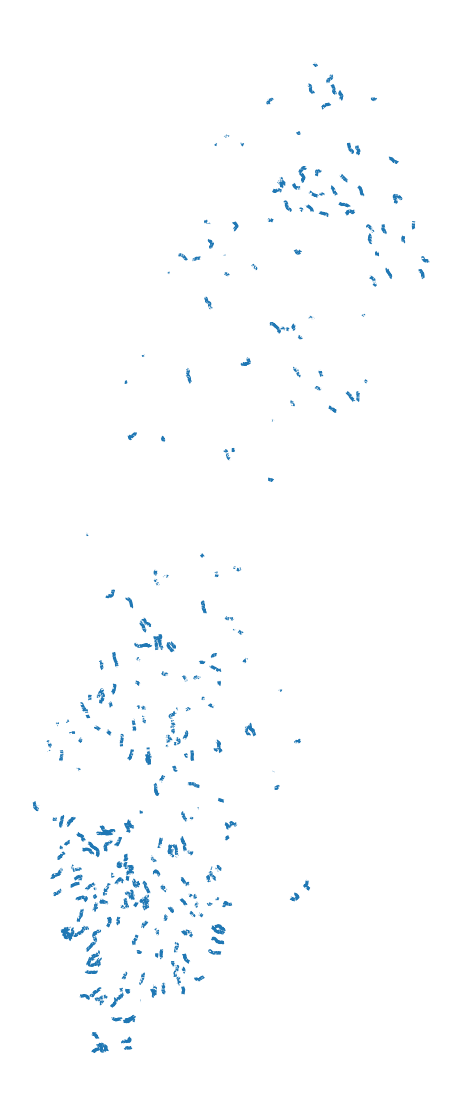

In [77]:
plt.figure(figsize=(10,10)) 
ax=plt.axes()
ax.axis('off')
# map_df_sweden.plot(edgecolor='black',facecolor='white',ax=ax)
map_df_sweden.loc[map_df_sweden['KKOD'] == 9660].plot(ax=ax)#(edgecolor='black',facecolor='white',ax=ax)


#overlay water in white
# map_df_kustlijn.plot(edgecolor='white', facecolor='blue',ax=ax);


In [79]:
map_df_sweden.sample(10)

KKOD    KATEGORI       NAMN1 NAMN2              ADAT  \
32094    611  Öppen mark        None  None  2014-05-20 15:27   
3230     901   Vattenyta        None  None  1912-12-12 12:00   
102972   601   Skogsmark        None  None  1912-12-12 12:00   
22737    901   Vattenyta        None  None  1912-12-12 12:00   
33776    911    Sankmark        None  None  1912-12-12 12:00   
18999    901   Vattenyta  Vilitsavon  None  1912-12-12 12:00   
135846   611  Öppen mark        None  None  2014-05-20 15:27   
114166   611  Öppen mark        None  None  2014-05-20 15:27   
139073   601   Skogsmark        None  None  1912-12-12 12:00   
58364    611  Öppen mark        None  None  2014-05-20 15:28   

                                                 geometry  
32094   POLYGON ((439168.613 7050088.144, 439223.962 7...  
3230    POLYGON ((785871.729 7498529.135, 785834.076 7...  
102972  POLYGON ((576009.025 6484266.852, 575700.350 6...  
22737   POLYGON ((469568.995 7193644.864, 469563.385 7...  
33776   POLYGON ((700000.000 7342603.810, 700000.000 7...  
18999   POLYGON ((598541.266 7383616.123, 598396.345 7...  
135846  POLYGON ((400000.000 6245237.818, 400000.000 6...  
114166  POLYGON ((462476.123 6368947.943, 462446.495 6...  
139073  POLYGON ((408079.224 6198933.429, 408009.868 6...  
58364   POLYGON ((517143.155 6948855.193, 517142.830 6...

In [85]:
map_df_sweden.loc[map_df_sweden['geometry'] > 874078]

TypeError: '>' not supported between instances of 'GeometryArray' and 'int'

In [80]:
map_df_sweden['KATEGORI'].value_counts()

Vattenyta                        40357
Öppen mark                       38577
Skogsmark                        34208
Sankmark                         22339
Tätort                            2113
Kalfjäll                          1372
Annan koncentrerad bebyggelse      861
Glaciär                            273
Hav, territorialt vatten           139
Alvarmark                           22
Name: KATEGORI, dtype: int64

In [76]:
map_df_sweden.loc[map_df_sweden['KATEGORI']=='Vattendrag smalare än 100 m, F6']

KKOD                         KATEGORI         NAMN1 NAMN2  \
12     9660  Vattendrag smalare än 100 m, F6          None  None   
14     9660  Vattendrag smalare än 100 m, F6          None  None   
17     9660  Vattendrag smalare än 100 m, F6          None  None   
19     9660  Vattendrag smalare än 100 m, F6  Vittankijoki  None   
24     9660  Vattendrag smalare än 100 m, F6  Vittankijoki  None   
...     ...                              ...           ...   ...   
57770  9660  Vattendrag smalare än 100 m, F6          None  None   
57772  9660  Vattendrag smalare än 100 m, F6          None  None   
57774  9660  Vattendrag smalare än 100 m, F6          None  None   
57778  9660  Vattendrag smalare än 100 m, F6          None  None   
57780  9660  Vattendrag smalare än 100 m, F6          None  None   

                   ADAT                                           geometry  
12     2013-04-25 18:30  LINESTRING (753868.137 7638315.242, 753874.057...  
14     2013-04-25 18:30  LINESTRING (748598.804 7630674.058, 748603.537...  
17     2013-04-25 18:30  LINESTRING (748543.283 7633579.937, 748598.780...  
19     2013-04-25 18:30  LINESTRING (748863.131 7634958.952, 748875.299...  
24     2013-04-25 18:30  LINESTRING (751918.911 7636353.397, 751980.900...  
...                 ...                                                ...  
57770  2013-05-21 12:04  LINESTRING (395909.899 6142886.931, 395860.227...  
57772  2013-05-21 12:04  LINESTRING (392238.683 6146491.532, 392263.453...  
57774  2013-05-21 12:04  LINESTRING (393674.558 6146644.614, 393748.432...  
57778  2013-05-21 12:04  LINESTRING (396764.592 6146680.448, 396768.046...  
57780  2013-05-21 12:04  LINESTRING (397752.975 6150805.860, 397747.019...  

[1288 rows x 6 columns]

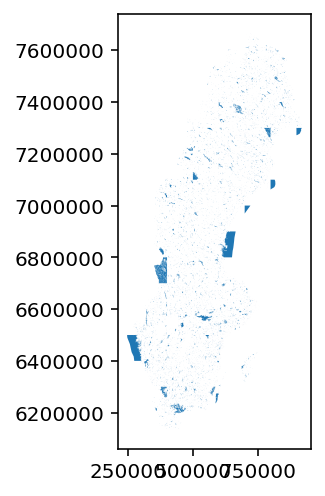

In [84]:
map_df_sweden.sample(10000).plot()

In [5]:
WoonKernen = shapedir+'Top10NL-Plaats_kern.shp'

map_df_woonkernen = gpd.read_file(WoonKernen)

In [6]:
provincies = shapedir+'2019_provinciegrenzen_watergrenzen.gpkg'

map_df_provincies = gpd.read_file(provincies)

In [7]:
roads = shapedir+'nwb-light.shp'

map_df_roads = gpd.read_file(roads)

In [8]:
rail = shapedir+'Top10NL_Spoorwegen.shp'

map_df_rail = gpd.read_file(rail)

What sets GeoPandas apart from 'ordinary' Pandas is the geometry column. This contains the information required for the plotting. POLYGON in the case below. In fact these may be any  Shapely geometric object. POINT and LINE will be the most common.

And since they are shapely objects, any operation from the shapely library may be performed on them. Distance between points, area's etc.

Plotting the dataframe Geopandas will automatically pick up the geometry column data and plot it.

(2906, 1)


geometry
0  POLYGON ((194752.765999999 583067.921999998, 1...
1  (POLYGON ((143412.807875 446039.3325, 143437.3...
2  POLYGON ((178608.440812498 565614.255687501, 1...
3  POLYGON ((236459.151000001 462939.798, 236545....
4  POLYGON ((76089.31974999981 402183.432250001, ...

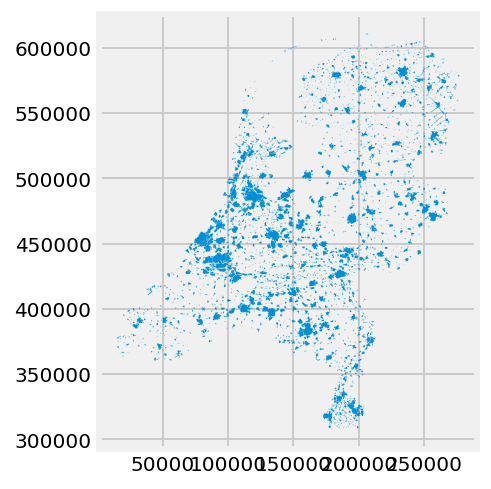

In [272]:
print(map_df_woonkernen.shape)
map_df_woonkernen.plot();
map_df_woonkernen.head()

(577, 5)


ROUTE ROUTE_CH  COUNT BEHEERDER  \
0   008    ##008      1         R   
1   010    ##010      1         R   
2   011    ##011      1         R   
3   013    ##013      1         R   
4   014    ##014      1         R   

                                            geometry  
0  LINESTRING (119963.732 492687.453, 120349.0445...  
1  LINESTRING (121893.377 492970.5425, 121981.238...  
2  LINESTRING (94683.8245000001 461740.591, 94730...  
3  LINESTRING (85382.00599999999 452781.718, 8527...  
4  LINESTRING (83975.507 458520.8865, 84048.36450...

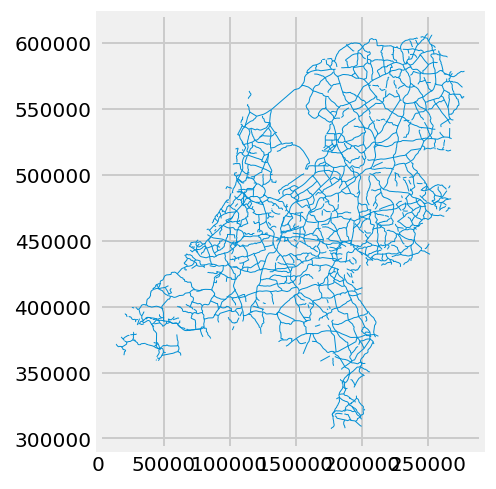

In [321]:
print(map_df_roads.shape)
map_df_roads.plot(lw=.5);
map_df_roads.head()

Normal Pandas commands, like masking, work.

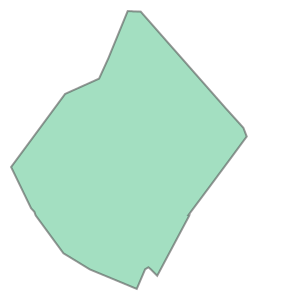

In [279]:
map_df_woonplaats.loc[5, 'geometry']

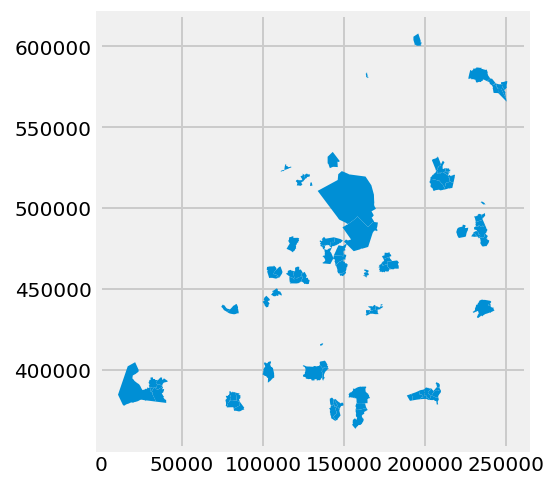

In [280]:
map_df_woonplaats.loc[0:100].plot();

All matplotlib ** kwargs work as well 

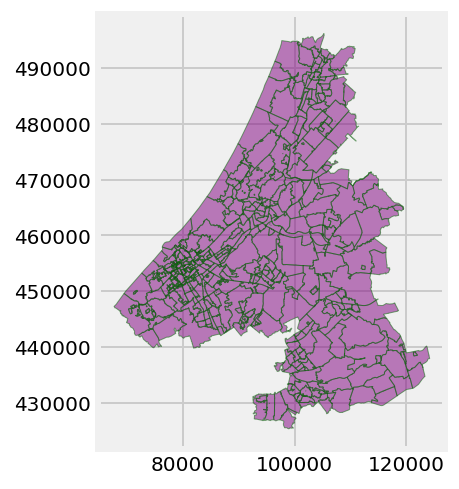

In [284]:
map_df_pc4.loc[(map_df_pc4['PC4'].astype(int) > 1999) & \
               (map_df_pc4['PC4'].astype(int) < 2999), ].plot\
            (facecolor='purple', edgecolor='darkgreen', alpha=.5)

In [55]:
map_df_pc4.dtypes

OBJECTID      float64
PC4            object
Aantal_mul      int64
Aantal_adr      int64
Shape_Leng    float64
Shape_Area    float64
geometry       object
dtype: object

In [296]:
map_df_provincies['provincienaam']

0         Groningen
1         Friesland
2           Drenthe
3        Overijssel
4        Gelderland
5           Utrecht
6     Noord-Holland
7      Zuid-Holland
8           Zeeland
9     Noord-Brabant
10          Limburg
11        Flevoland
Name: provincienaam, dtype: object

## Making pretty maps

Making maps that are value-add may not be as straight forward as it seems.

### Layering and Chorlopleths 

Shape files are in fact a collection of polygons that plotted, single or together, may represent something a human recognizes...as some geographic shape. Cmap will assign a color automatically. (the legend does not work yet) 

No handles with labels found to put in legend.


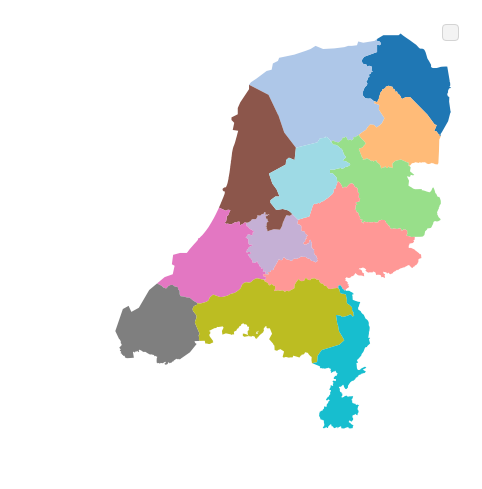

In [299]:
# NL provinces
ax=plt.axes()

ax.axis('off')
map_df_provincies.plot(cmap='tab20',ax=ax, label=map_df_provincies['provincienaam'])

plt.legend();


A 5th year pupil in a NL primary school will recognize this as NL but wonder where the inland lake is. This is where 'layering' comes in: plotting a set of polygons that represent the water. Plotting takes place in the top to bottom order. Very much like sending shapes in Powerpoint to the front or back

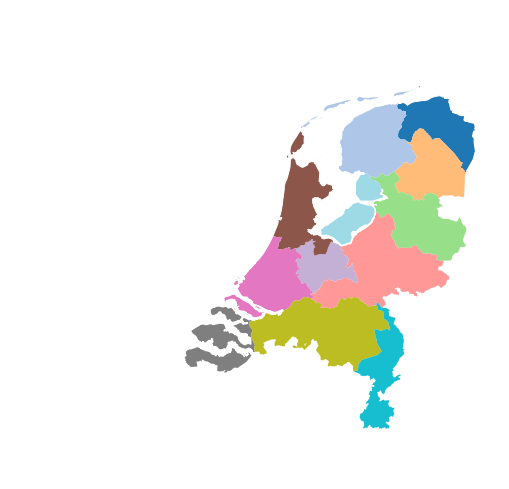

In [300]:
ax=plt.axes()
ax.axis('off')
map_df_provincies.plot(cmap='tab20',ax=ax)
#overlay water in white
map_df_kustlijn.plot(edgecolor='white', facecolor='white',ax=ax);

This looks a lot better and will be recognized as the Netherlands. By layering a lot of other features may be added

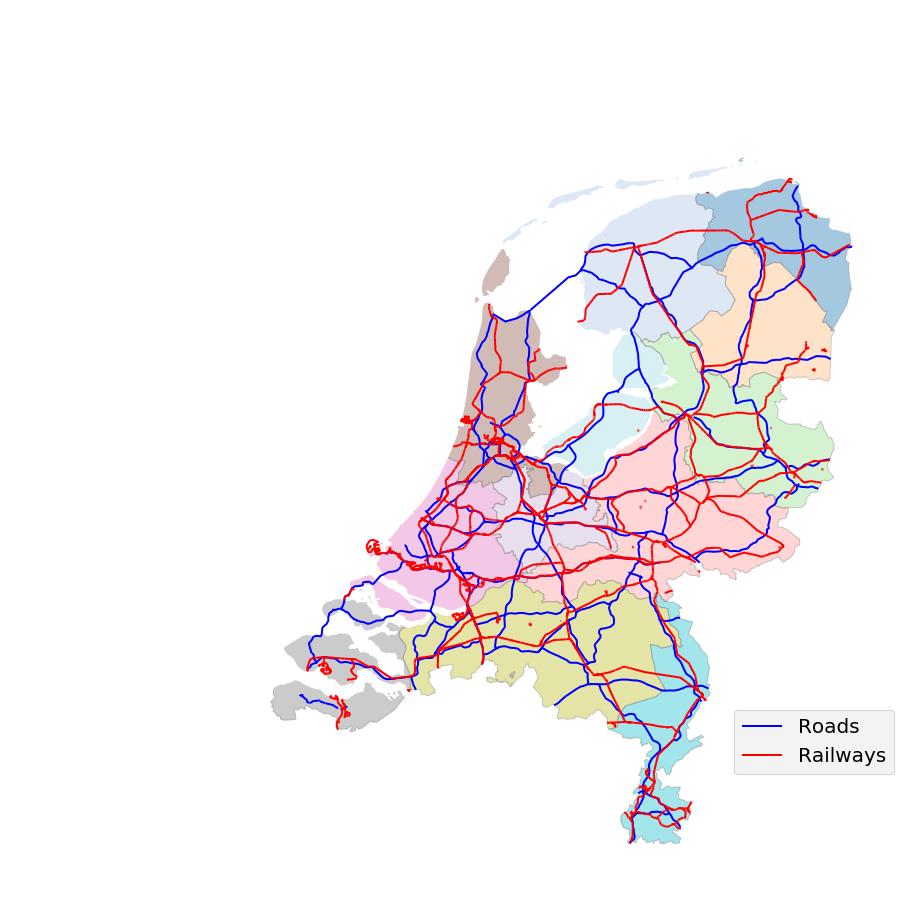

In [317]:
plt.figure(figsize=(8,8)) 
ax = plt.axes()
ax.axis('off')
# alpha makes it opaque
map_df_provincies.plot(cmap='tab20',ax=ax, facecolor='white', edgecolor='grey', alpha=.4)
# add major roads
map_df_roads.loc[map_df_roads['BEHEERDER']=='R'].plot(lw=1, color='blue', ax=ax, label='Roads')
# add rail rods
map_df_rail.loc[map_df_rail['typespoorb']=='trein'].plot(lw=1, color='r', ax=ax, label='Railways')
#Zorder=1 ensures it gets plotted as second layer (start @ 0)
map_df_kustlijn.plot(edgecolor='white', facecolor='white',ax=ax, zorder=1)

plt.legend(bbox_to_anchor=(0.8, .2), loc=2, borderaxespad=0.);

As stated making a map may not be straight forward. This image gets convoluted very quickly.


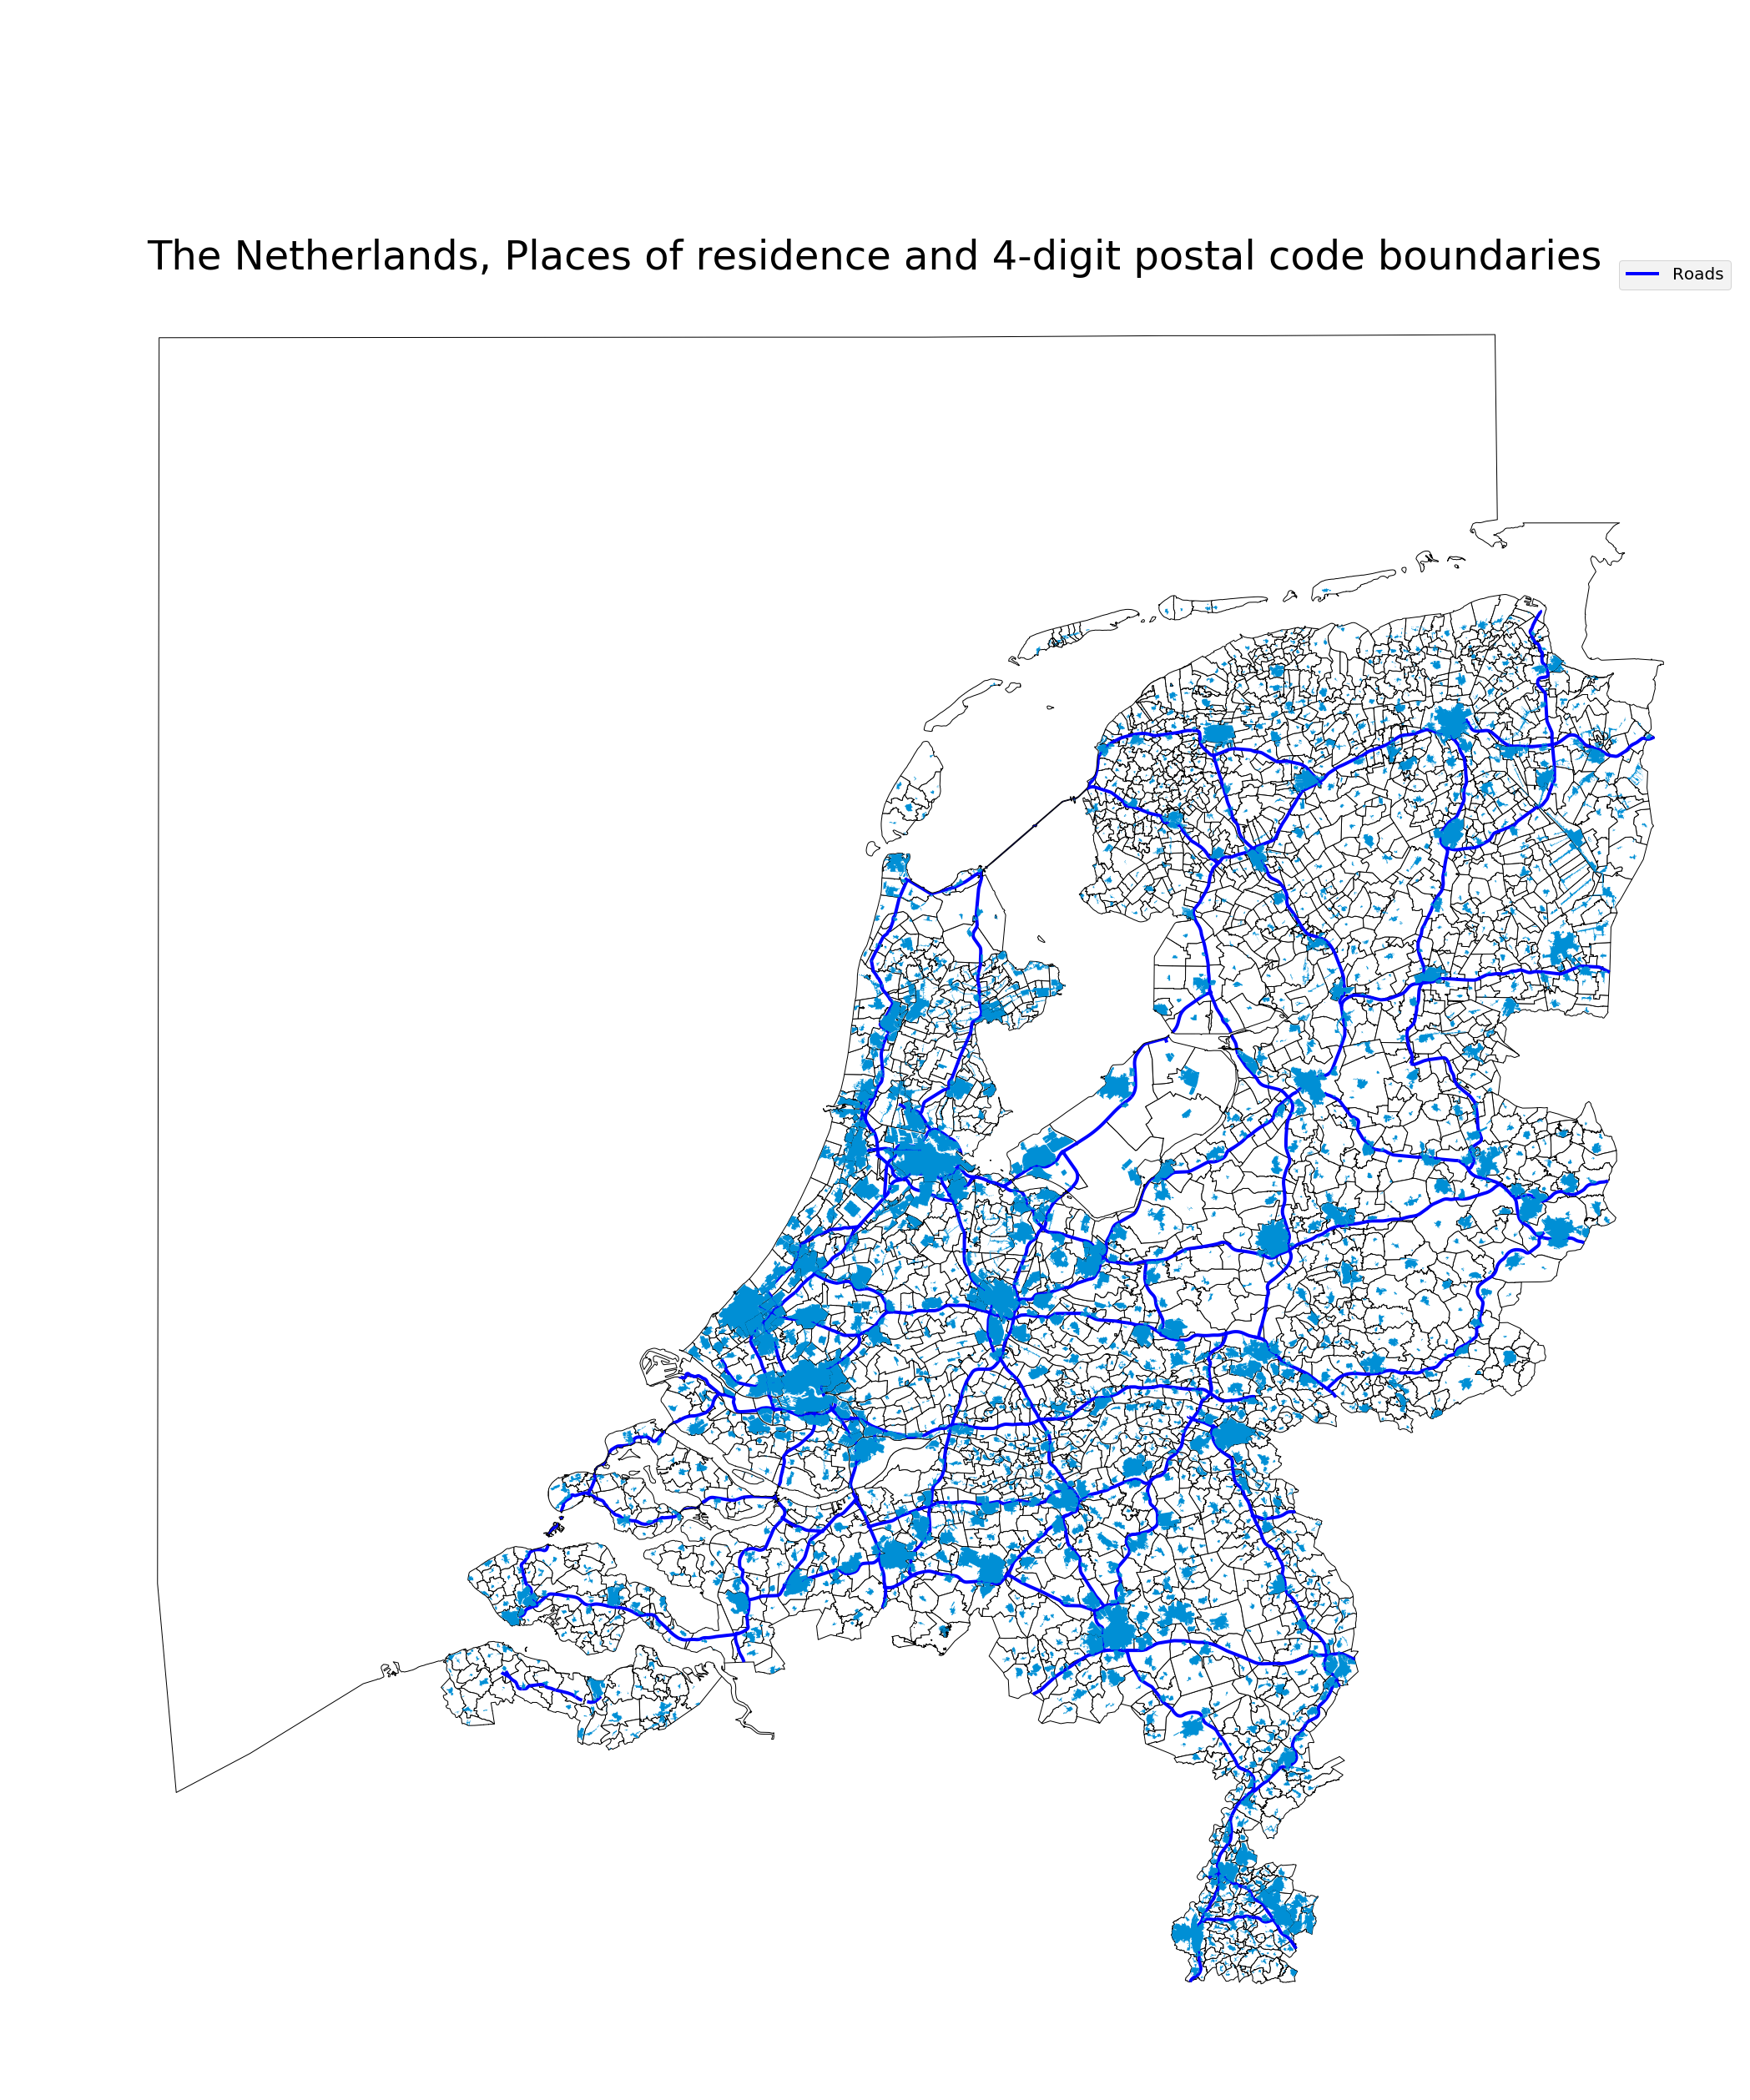

In [73]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes()
ax.set_aspect('equal')
ax.set_axis_off()
# ax.axis('equal')
# ax.axis('off')
# map_df_provincies.plot(ax=ax, linewidth=1, edgecolor="black", facecolor='None',zorder=7)
map_df_kustlijn.plot(edgecolor='black', facecolor='white',ax=ax, zorder=3)
map_df_woonplaats.plot(facecolor='white', edgecolor='black', ax=ax, label='Built-up Area')
# map_df_pc4.plot(ax=ax, alpha=1, edgecolor='black', facecolor='None')
map_df_WoonKernen.plot(ax=ax,zorder=4, label='Built-up Area')
map_df_roads.loc[map_df_roads['BEHEERDER']=='R'].plot(lw=2, color='blue', ax=ax, label='Roads')

fig.suptitle("\n\n\n\n\nThe Netherlands, Places of residence and 4-digit postal code boundaries", fontsize=24)
plt.legend()
plt.show()

### Adding annotations

Maps often only get a meaning when textual pointers are added: annotations in Matplotlib terms.  
To achieve this Matplotlib requires to be told what(text) to put where(on the map). In the case of a shape it may not be obvious. Luckily shapely comes to rescue.

In [9]:
map_df_provincies['rep']= map_df_provincies['geometry'].representative_point()

map_df_provincies.sample(1, random_state=1)

id  gid code provincienaam  \
2   3    3   22       Drenthe   

                                            geometry  \
2  (POLYGON ((207869.464 536733.644, 207862.002 5...   

                                           rep  
2  POINT (242481.4149605625 547295.3285000001)

In [10]:
map_df_provincies_points = map_df_provincies.copy()
map_df_provincies_points.set_geometry('rep', inplace = True)
map_df_provincies_points.sample(1, random_state=1)

id  gid code provincienaam  \
2   3    3   22       Drenthe   

                                            geometry  \
2  (POLYGON ((207869.464 536733.644, 207862.002 5...   

                                           rep  
2  POINT (242481.4149605625 547295.3285000001)

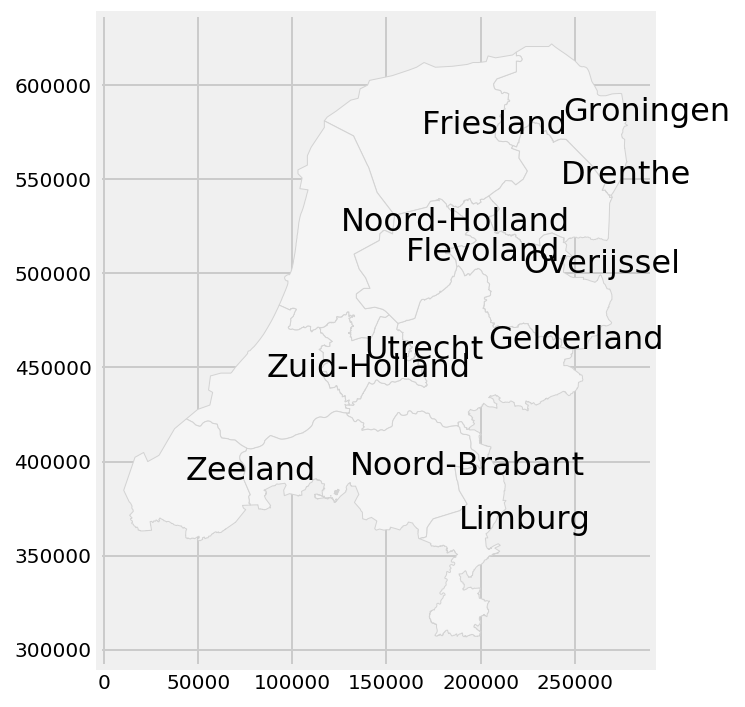

In [335]:
ax = map_df_provincies.plot(figsize = (6, 6), color = "whitesmoke", 
                            edgecolor = "lightgrey", linewidth = 0.5)

texts = []

for x, y, label in zip(map_df_provincies_points.geometry.x, 
                       map_df_provincies_points.geometry.y, 
                       map_df_provincies_points['provincienaam']):
                        texts.append(plt.text(x, y, label, fontsize = 16))

# import adjustText as aT
# aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
#                arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))

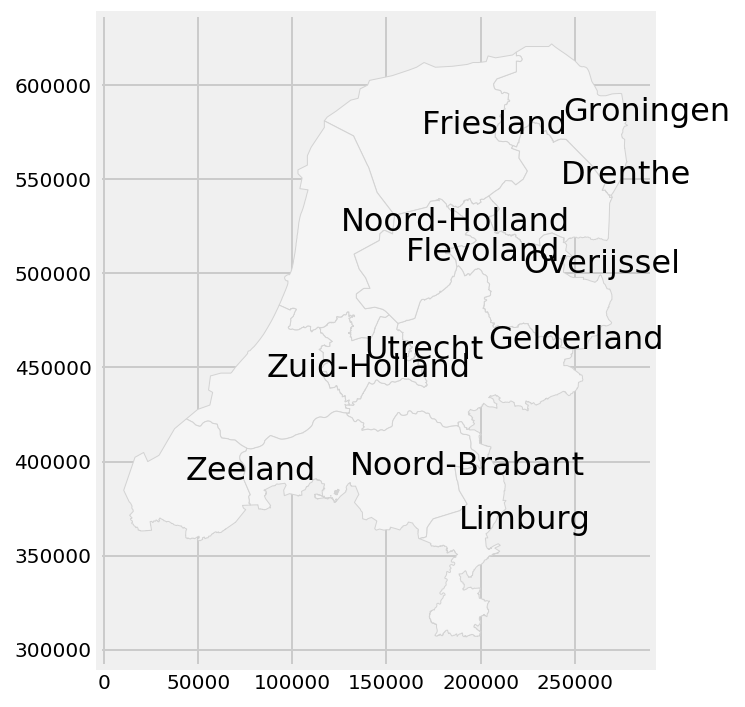

In [359]:
#together
map_df_provincies['rep']= map_df_provincies['geometry'].representative_point()
map_df_provincies_points = map_df_provincies.copy()
map_df_provincies_points.set_geometry('rep', inplace = True)

ax = map_df_provincies.plot(figsize = (6, 6), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)

texts = []

for x, y, label in zip(map_df_provincies_points.geometry.x, 
                       map_df_provincies_points.geometry.y, 
                       map_df_provincies_points['provincienaam']):
                        texts.append(plt.text(x, y, label, fontsize = 16))

# import adjustText as aT
# aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
#                arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))

On a pretty map. This is actually very close to a primary school wall map

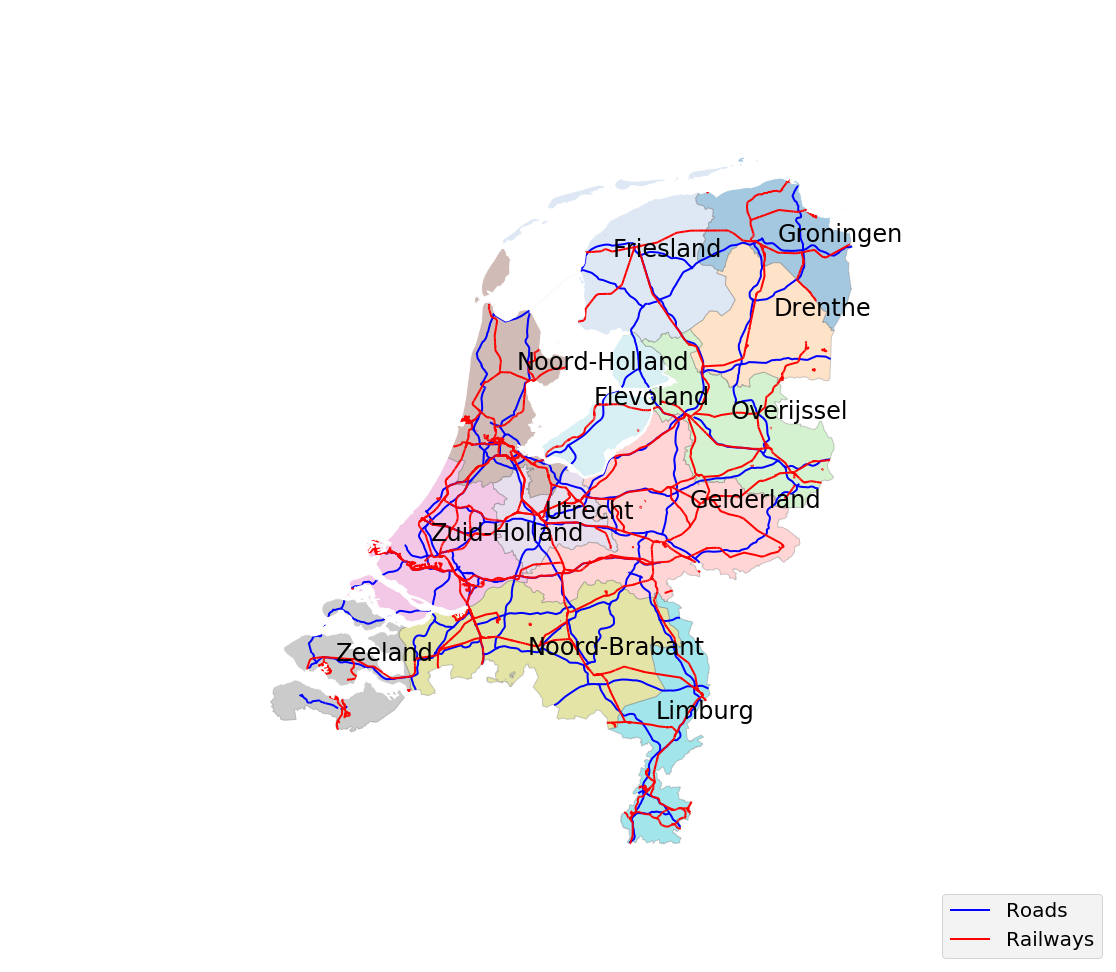

In [103]:
plt.figure(figsize=(8,8)) 
ax = plt.axes()
ax.axis('off')
map_df_provincies.plot(cmap='tab20',ax=ax, facecolor='white', edgecolor='grey', alpha=.4)
map_df_kustlijn.plot(edgecolor='white', facecolor='white',ax=ax, zorder=3)
map_df_roads.loc[map_df_roads['BEHEERDER']=='R'].plot(lw=1, color='blue', ax=ax, label='Roads')
map_df_rail.loc[map_df_rail['typespoorb']=='trein'].plot(lw=1, color='r',ax=ax, label='Railways')
for x, y, label in zip(map_df_provincies_points.geometry.x, map_df_provincies_points.geometry.y, map_df_provincies_points['provincienaam']):
    texts.append(plt.text(x, y, label, fontsize = 12, weight='medium'))
plt.legend(bbox_to_anchor=(1.05, 0), loc=2, borderaxespad=0.5);

### Adding points from Google

A basic map would include some landmarks, provincial capitals for arguments' sake. 


Now it gets complex quickly: enter the world of projections and transformations. Some key points:

- A map is a projection of a sphere ('It's the earth...stupid') on a flat surface. By definition there is distortion.
- CRS is the Coordinate Reference System. Common CRS's:
    - Lat/Lon (Latitude(=North/South)/Longitude(=West/East)
        - Degrees, Minutes, Seconds
        - Degrees with decimal points
    - X/Y
        - in meters, i.e.X = Lat. in Meters Y = Lon in Meters
- ESPG Geodetic Parameter Dataset, is the database which contains all crs's. For every country likes to have their earth as flat as possible, every country maintain their own (set of) csr(s). For NL this is csr 'epsg:28992'. Basically is states that the projection looks down from a point above the centre of the NL coincidentally the lovely town of Amersfoort is measured in meters from the Equator and meters from the Greenwich meridian.

Typically geopandas takes care of this under the hood, but layering maps with different crs's means trouble.



> 'Understanding the transform and projection keywords It can be easy to get confused about what the projection and transform keyword arguments actually mean... 
... The core concept is that the projection of your axes is independent of the coordinate system your data is defined in. The projection argument is used when creating plots and determines the projection of the resulting plot (i.e. what the plot looks like). The transform argument to plotting functions tells Cartopy what coordinate system your data are defined in.'    
> from: https://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html  
> also: https://gis.stackexchange.com/questions/48949/epsg-3857-or-4326-for-googlemaps-openstreetmap-and-leaflet

In [385]:
map_df_woonplaats.crs

{'init': 'epsg:28992'}

In [386]:
#Looking up coordinates of Amsterdam manually
Lat=52.3545653,
Lon=4.8585408
Amsterdam = Point((4.8585408,52.3545653))
AmsterdamS = gpd.GeoSeries([Amsterdam], crs={'init': 'epsg:4326'})
AmsterdamS.crs

{'init': 'epsg:4326'}

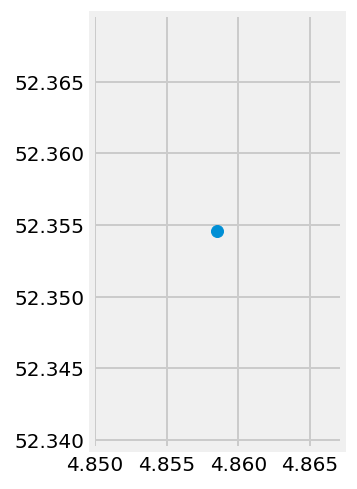

In [387]:
#Looking up coordinates of Amsterdam manually and plotting the point
Lat=52.3545653,
Lon=4.8585408
Amsterdam = Point((4.8585408,52.3545653))
AmsterdamS = gpd.GeoSeries([Amsterdam])#, crs={'init': 'epsg:4326'})
AmsterdamS.plot()

(118983.31580531735, 118983.33201516116, 485316.2368358357, 485316.2555147285)

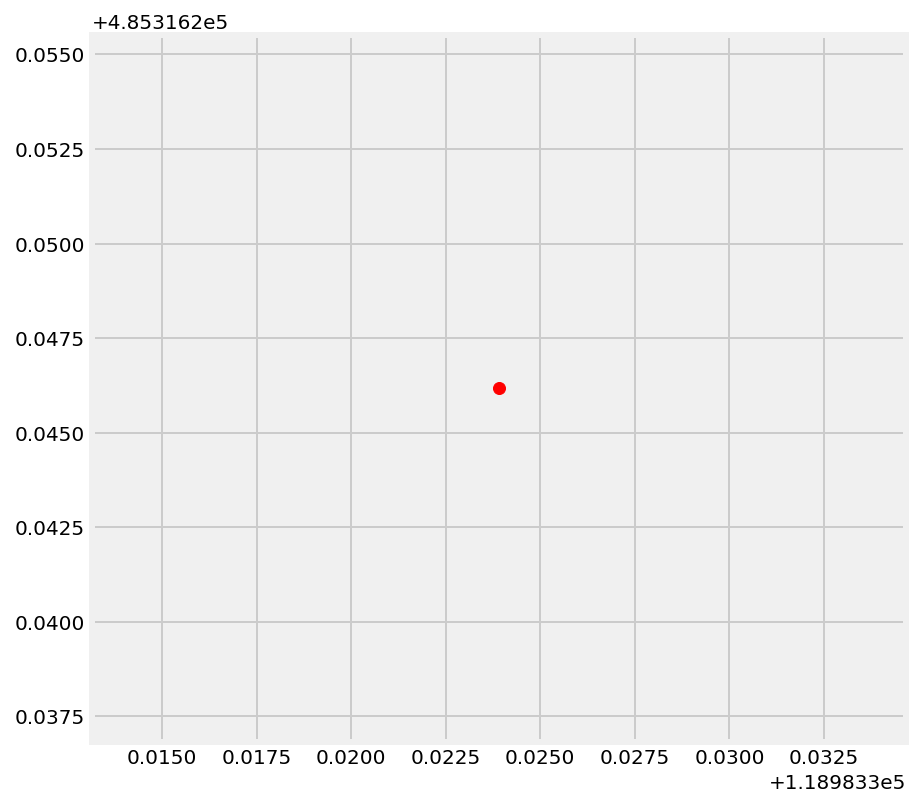

In [397]:
#Transforming it put it on the right scale
from shapely.geometry import Point
from matplotlib import pyplot
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

plt.figure(figsize=(6.5,6.5))
ax = plt.axes()

AmsterdamS.to_crs(crs={'init': 'epsg:28992'}).plot(ax=ax, c='r')
plt.axis('equal')

(-2953.7083999999995, 291406.0804, 291094.6928999999, 637627.8051)

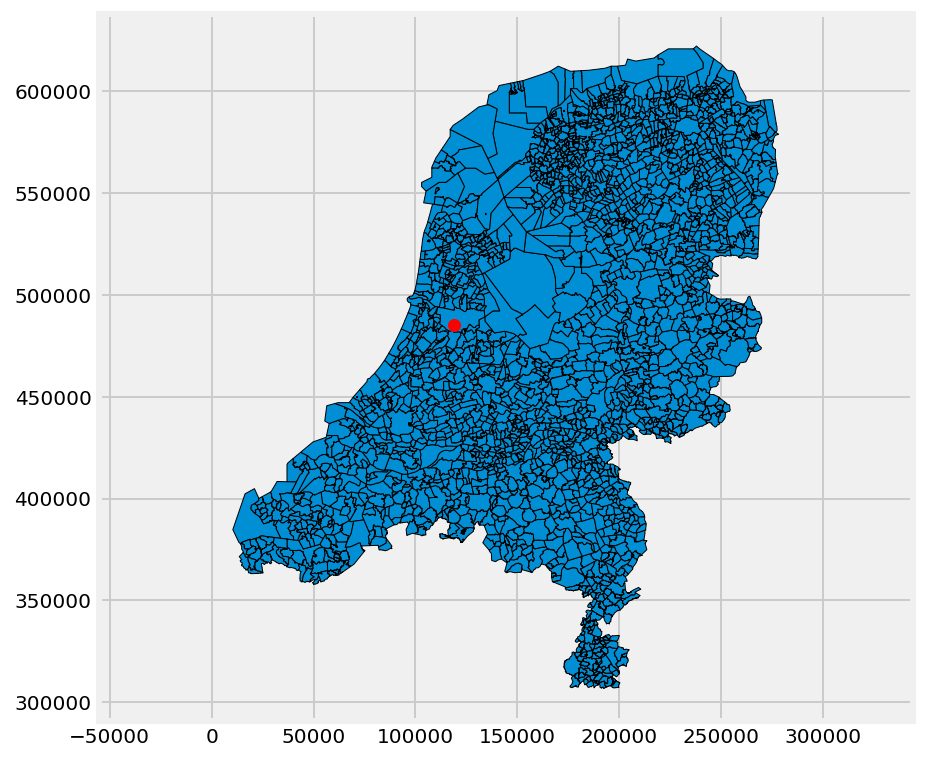

In [396]:
# Pulling it all together

from shapely.geometry import Point
from matplotlib import pyplot
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig, ax = pyplot.subplots(figsize=(6.5, 6.5))
map_df_woonplaats.plot(edgecolor='black', ax=ax)

final_crs = {'init': 'epsg:28992'}

Amsterdam = Point((4.8585408,52.3545653))
AmsterdamS = gpd.GeoSeries([Amsterdam], crs={'init': 'epsg:4326'})
AmsterdamS.to_crs(final_crs).plot(ax=ax, c='r')

plt.axis('equal')

{'init': 'epsg:28992'}


(3.111975323123453, 7.42347574222345, 50.60906469452001, 53.71772607664506)

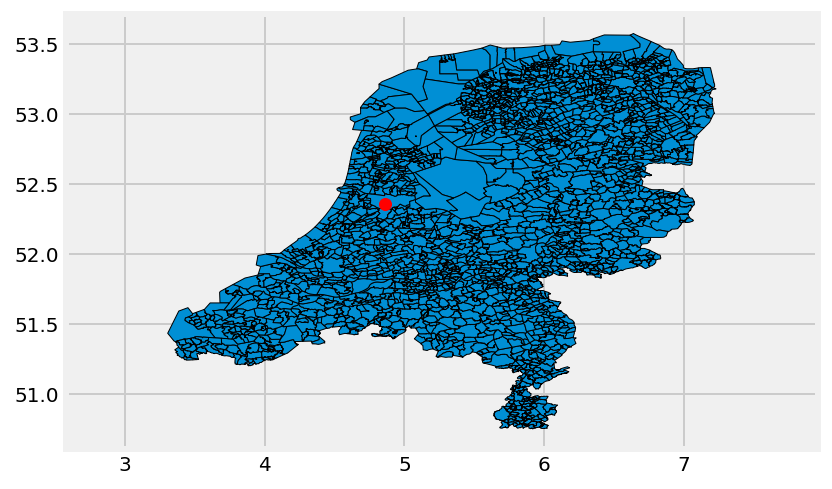

In [309]:
# the other way round is also possible 
from shapely.geometry import Point
from matplotlib import pyplot
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

final_crs = {'init': 'epsg:4326'}
data_crs={'init': 'epsg:28992'}
ax = plt.axes()
print(map_df_woonplaats.crs)
map_df_woonplaats.to_crs(crs=final_crs).plot(figsize=(20,12), edgecolor='black', ax=ax)
# 

lon=52.3545653,
lat=4.8585408
Amsterdam = Point((4.8585408,52.3545653))
AmsterdamS = gpd.GeoSeries([Amsterdam], crs={'init': 'epsg:4326'})
AmsterdamS.to_crs(crs=final_crs).plot(ax=ax, c='r')
plt.axis('equal')

This looks a little squashed. This due to the projection: this is looking down from a plane perpendicular to the perpendicular at the equator (aka a bird's view)

Now the 1000 USD question is: how can I the 'long' NL with axis in degrees( spend hours on it)

### Plotting a list of points

Wanting to complete the provincial map with the provincial capitals a manual list of lat/lon coordinates was compiled from google maps.

In [275]:
df_prov_caps =  pd.read_excel(shapedir+'ProvCaps.xlsx')

In [276]:
geometry = [Point(xy) for xy in zip(df_prov_caps['lon'], df_prov_caps['lat'])]

In [277]:
map_df_prov_caps = gpd.GeoDataFrame(df_prov_caps,
                                crs={'init': 'epsg:4326'},
                                geometry=geometry)

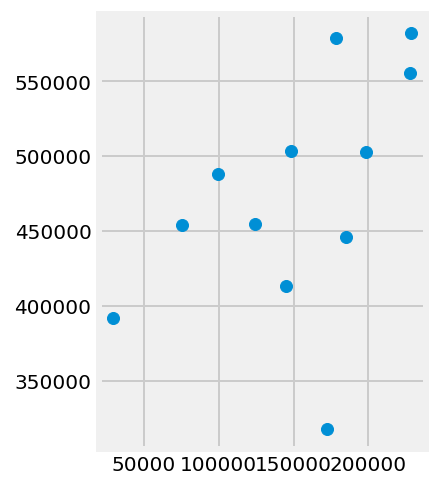

In [310]:
final_crs = {'init': 'epsg:28992'}

map_df_prov_caps.to_crs(crs=final_crs, inplace=True)
map_df_prov_caps.plot();

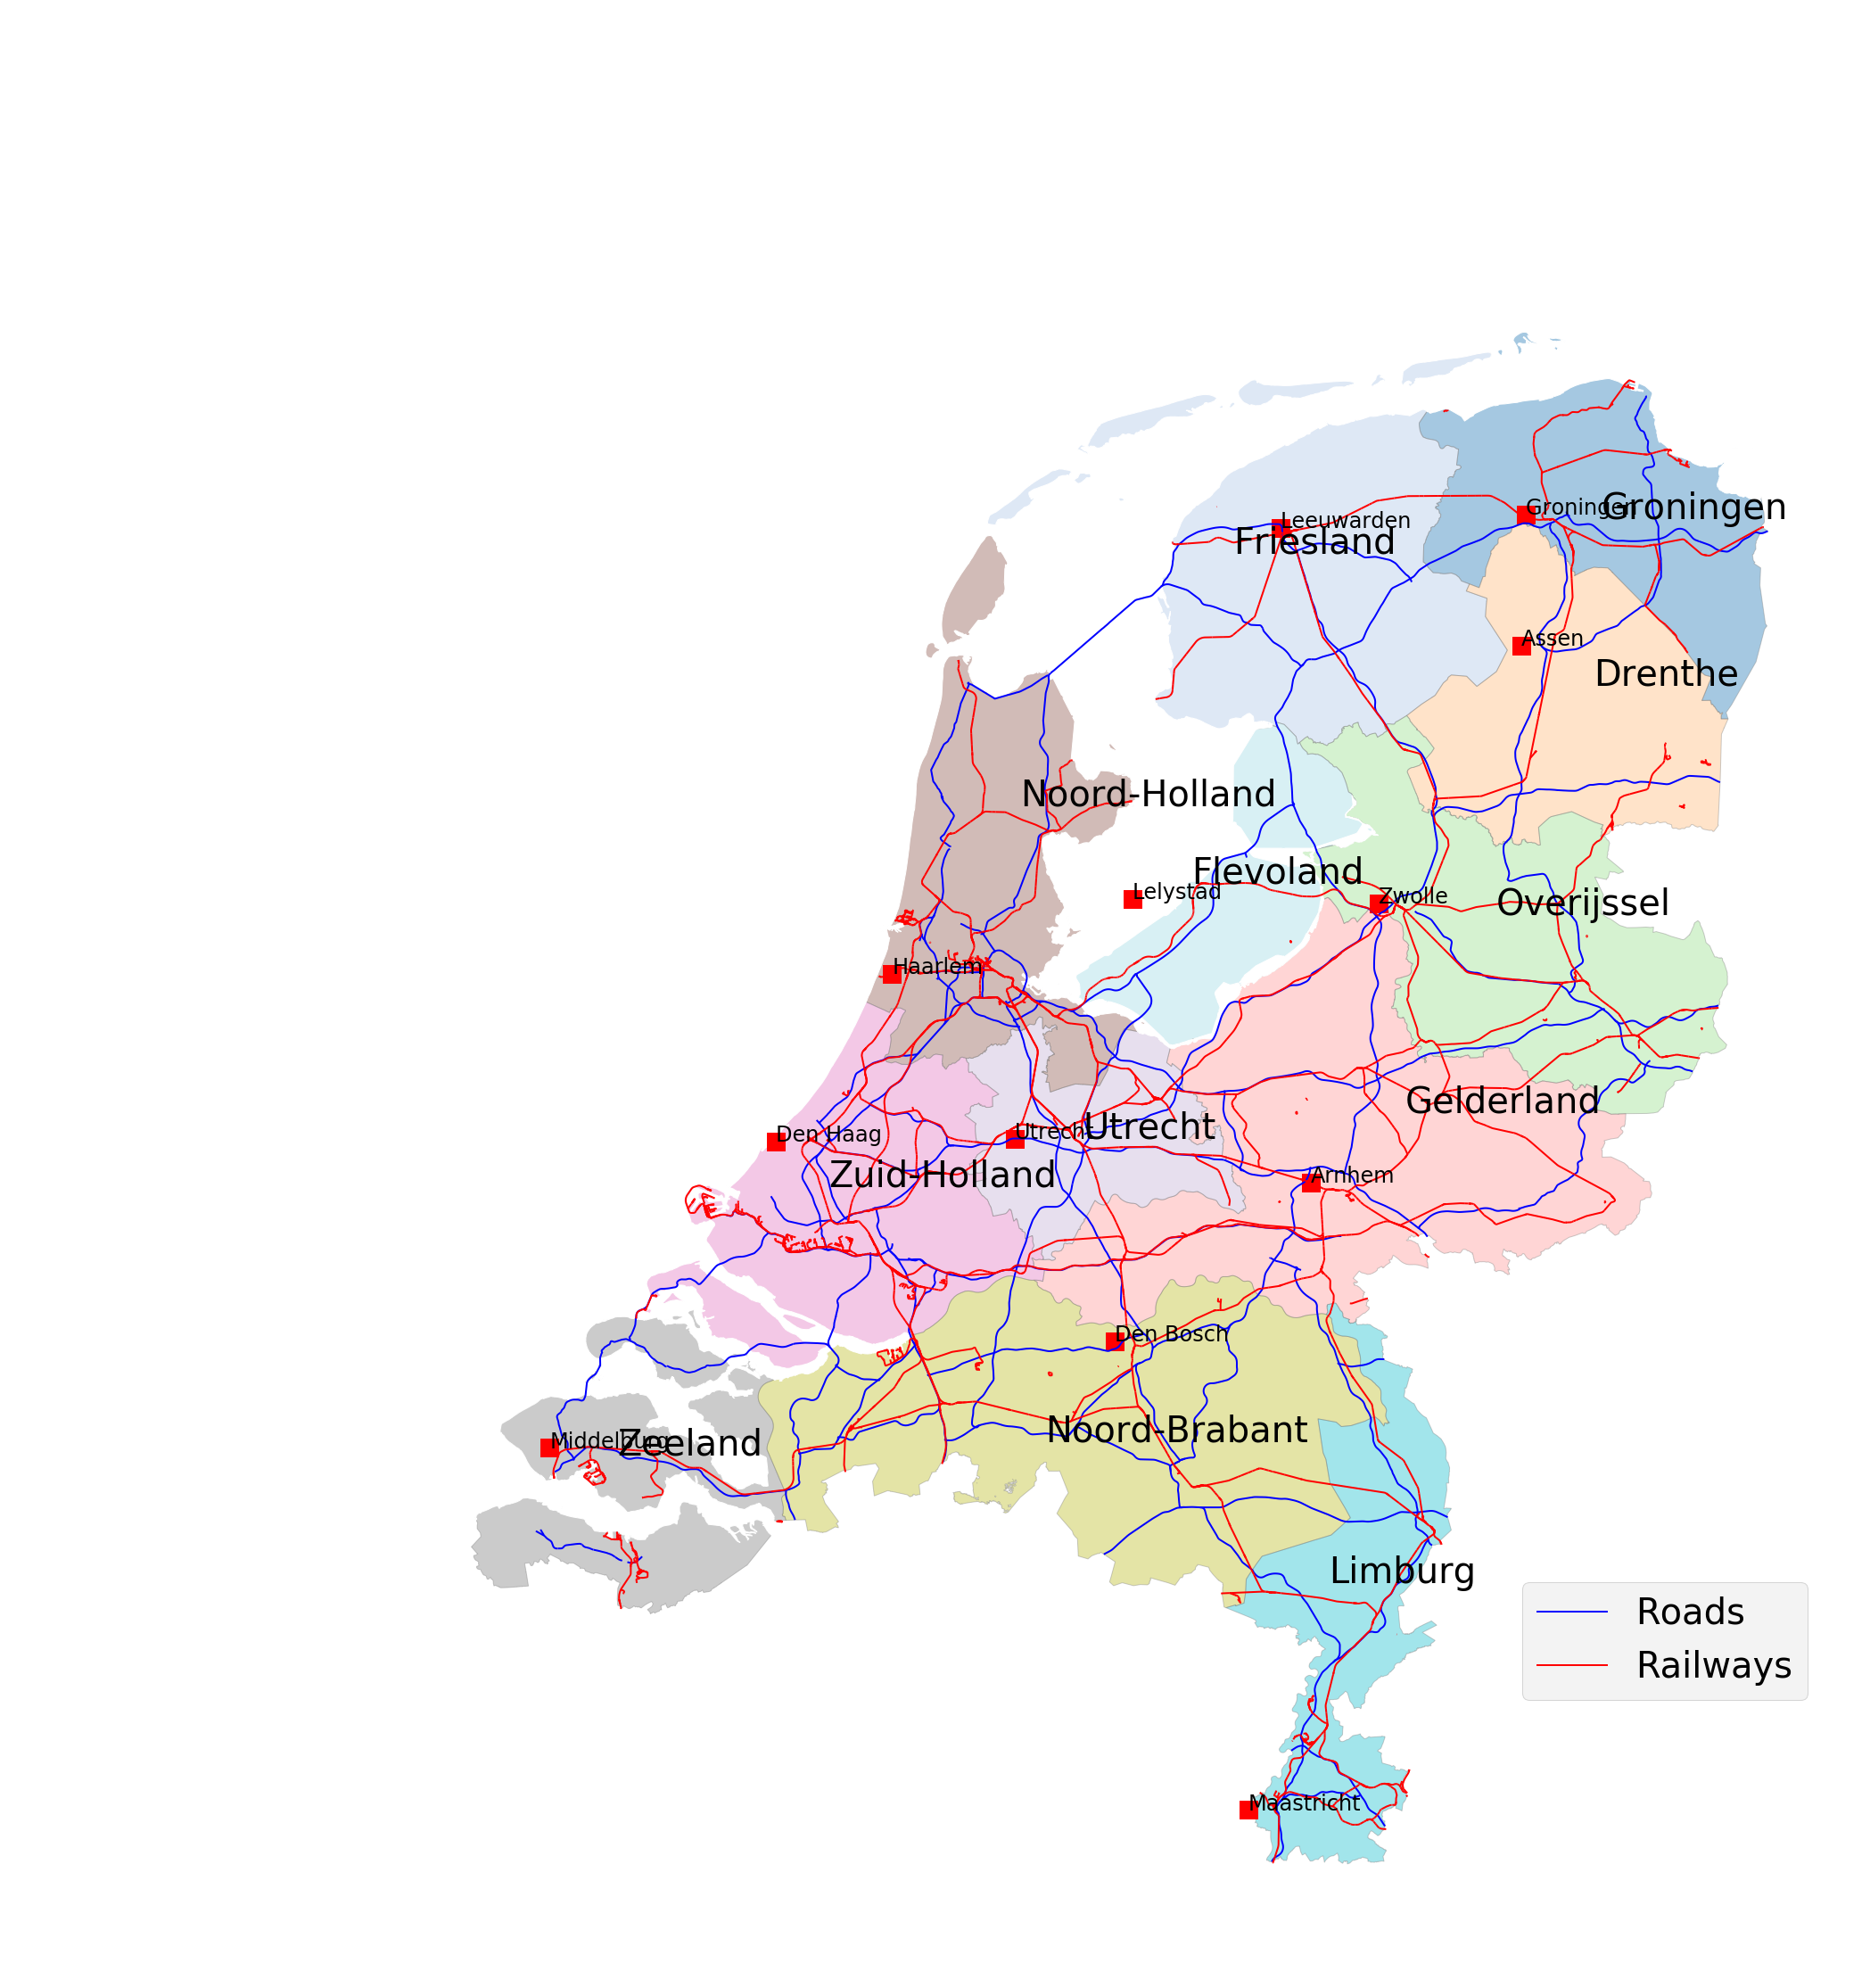

In [311]:
plt.figure(figsize=(20,20)) 
ax = plt.axes()
ax.axis('off')
map_df_provincies.plot(cmap='tab20',ax=ax, facecolor='white', edgecolor='grey', alpha=.4)
map_df_kustlijn.plot(edgecolor='white', facecolor='white',ax=ax)
map_df_roads.loc[map_df_roads['BEHEERDER']=='R'].plot(lw=1, color='blue', ax=ax, label='Roads')
map_df_rail.loc[map_df_rail['typespoorb']=='trein'].plot(lw=1, color='r',ax=ax, label='Railways')
map_df_prov_caps.to_crs(crs=final_crs).plot(ax=ax, c='r', marker='s', markersize=100)
for x, y, label in zip(map_df_provincies_points.geometry.x, map_df_provincies_points.geometry.y, map_df_provincies_points['provincienaam']):
    texts.append(plt.text(x, y, label, fontsize = 20, weight='medium'))
caps = []
for x, y, label in zip(map_df_prov_caps.geometry.x, map_df_prov_caps.geometry.y, map_df_prov_caps['Naam']):
    caps.append(plt.text(x, y, label, fontsize = 12))
plt.legend(bbox_to_anchor=(.8, .2), loc=2, borderaxespad=0.5, prop={'size': 20});






In [418]:
caps

[Text(99358.0715321331, 488328.629512841, 'Haarlem'),
 Text(75658.98323059424, 454155.95889813657, 'Den Haag'),
 Text(29522.994131178086, 391664.171988879, 'Middelburg'),
 Text(144826.02659725436, 413481.86983724864, 'Den Bosch'),
 Text(172099.63941045772, 317824.3937392988, 'Maastricht'),
 Text(184720.91452111537, 445824.3107143339, 'Arnhem'),
 Text(198638.5695011354, 502673.4450767784, 'Zwolle'),
 Text(227724.63991563866, 555324.5108162604, 'Assen'),
 Text(228659.2268907826, 582051.2302799419, 'Groningen '),
 Text(178575.68692146722, 579319.1998001068, 'Leeuwarden'),
 Text(148402.31130928991, 503596.6709185987, 'Lelystad'),
 Text(124344.60496484228, 454730.7128177088, 'Utrecht')]

It actually shows that is pretty hard to make a pretty map, with legible text and labels. It is very likely that manual intervention is needed

## Simple GIS

Drawing neat maps is one thing but conveying functional information is another. In the field of Social, Physical or Economic Geography showing the spacial distribution of a feature can be very revealing.

### Load data

Same procedure as for the maps above. File below is for the Central Bureau of Statistics (hence CBS) and contains summary social/economic/demographic stats by 4-digit postal code. The 'geometry' column makes it a GIS capable dataset. Features are associated with a plotable spatial reference.

In [11]:
cbs = shapedir +'CBS_PC4_2017_v1.shp'

map_df_cbs = gpd.read_file(cbs)

In [12]:
map_df_cbs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4066 entries, 0 to 4065
Data columns (total 35 columns):
PC4           4066 non-null int64
INWONER       4066 non-null int64
MAN           4066 non-null int64
VROUW         4066 non-null int64
INW_014       4066 non-null int64
INW_1524      4066 non-null int64
INW_2544      4066 non-null int64
INW_4564      4066 non-null int64
INW_65PL      4066 non-null int64
GEBOORTE      4066 non-null int64
P_AUTOCHT     4066 non-null int64
P_WALLOCH     4066 non-null int64
P_NWALLOCH    4066 non-null int64
AANTAL_HH     4066 non-null int64
TOTHH_EENP    4066 non-null int64
TOTHH_MPZK    4066 non-null int64
HH_EENOUD     4066 non-null int64
HH_TWEEOUD    4066 non-null int64
GEM_HH_GR     4066 non-null float64
WONING        4066 non-null int64
WONVOOR45     4066 non-null int64
WON_4564      4066 non-null int64
WON_6574      4066 non-null int64
WON_7584      4066 non-null int64
WON_8594      4066 non-null int64
WON_9504      4066 non-null int64

In [13]:
map_df_cbs.head()

PC4  INWONER    MAN  VROUW  INW_014  INW_1524  INW_2544  INW_4564  \
0  1011     9645   4990   4655      800      1195      3195      2920   
1  1012     8240   4480   3760      465      1195      4195      1730   
2  1013    21080  10550  10525     2640      1860      7685      6115   
3  1014      645    375    270       65        45       400       115   
4  1015    14810   7545   7265     1410      1465      5235      4365   

   INW_65PL  GEBOORTE  P_AUTOCHT  P_WALLOCH  P_NWALLOCH  AANTAL_HH  \
0      1540        75         60         30          10       6380   
1       650        50         50         30          10       5960   
2      2775       280         60         20          20      12580   
3        20        15         60         20          20        330   
4      2340       125         60         30          10       9740   

   TOTHH_EENP  TOTHH_MPZK  HH_EENOUD  HH_TWEEOUD  GEM_HH_GR  WONING  \
0        4175        1305        345         500        1.5    6110   
1        4245        1175        190         260        1.4    5695   
2        7525        2430       1020        1510        1.7   12825   
3         170         105         10          45        1.7     270   
4        6340        1925        535         860        1.5    9865   

   WONVOOR45  WON_4564  WON_6574  WON_7584  WON_8594  WON_9504  WON_0514  \
0       3605       115       115       800       390       670       370   
1       4725        20        50        85       490       225       105   
2       6930        75       115      1625      1475       445      2005   
3         20         5         5         5        20       185    -99997   
4       7275       100       235       755      1075       340        80   

   WON_1524  WON_MRGEZ  G_GAS_WON  G_ELEK_WON  UITKMINAOW    OAD  STED  \
0        45       5915        900        2060         825   6907     1   
1    -99997       5380       1090        2150         480   8410     1   
2       160      12670        920        1990        2720   6224     1   
3        25        225       1000        2160          80   2645     1   
4    -99997       9385       1050        1960        1395  10975     1   

                                            geometry  
0  POLYGON ((122246.2320000008 487910.1770000011,...  
1  POLYGON ((121995.0291999988 488243.2021000013,...  
2  (POLYGON ((120506.2192000002 489494.5513000004...  
3  (POLYGON ((120390.1125999987 489860.7457000017...  
4  POLYGON ((120665.6422999986 488535.5, 120668.7...

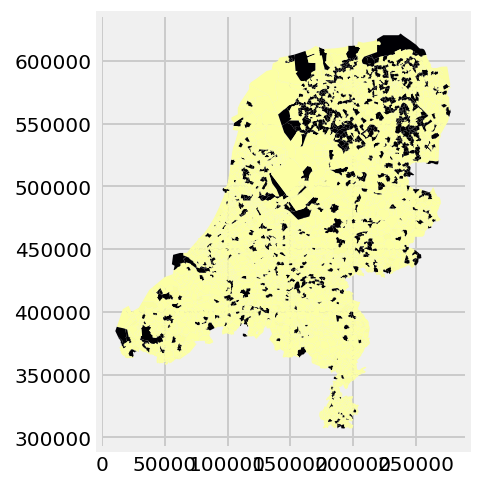

In [14]:
#Pick a column 'GEBOORTE', childbirths per year
map_df_cbs.plot(column='GEBOORTE', cmap='inferno', label=map_df_cbs['GEBOORTE']);

In [445]:
# Quick and dirty solution NA's
map_df_cbs.loc[map_df_cbs['GEBOORTE'].astype(int)<0]=map_df_cbs['GEBOORTE']\n
.loc[map_df_cbs['GEBOORTE'].astype(int)>0].mean()

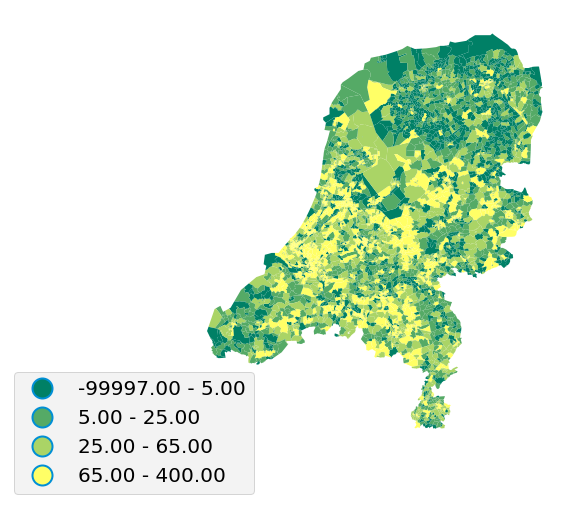

In [227]:
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# http://geopandas.org/mapping.html

#does not properly work yet)

fig, ax = plt.subplots(1, 1)
ax.axis('off')


map_df_cbs.plot(column='GEBOORTE', 
                cmap='summer', 
                label=map_df_cbs['GEBOORTE'], 
                scheme='quantiles',
                legend=True,
                k=4,
                ax=ax);
leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 0.2, 0.2));

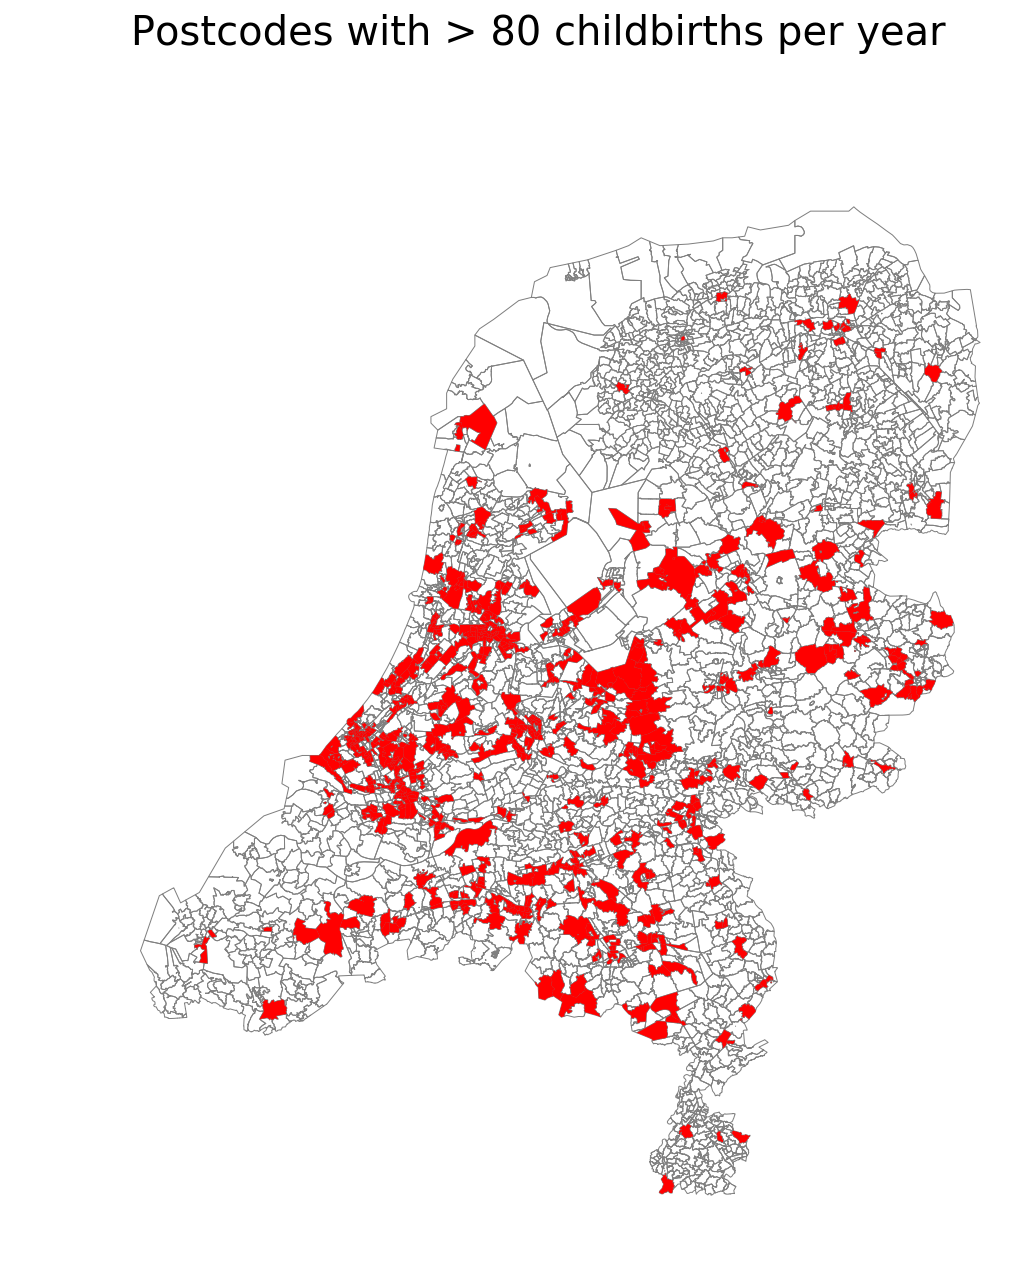

In [466]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
ax.axis('off')
map_df_pc4.plot(ax=ax, alpha=1, edgecolor='grey', facecolor='None')
map_df_cbs.loc[map_df_cbs['GEBOORTE'].astype(int)> 80].plot(ax=ax, 
                                                              facecolor='r', 
                                                              label='Births p.a.> 80', 
                                                              legend=True)
fig.suptitle('Postcodes with > 80 childbirths per year', fontsize=20);

### Merging Geopandas

Postal codes do not mean anything sensible to most people. 'Gemeente' ('Municipality') is the lowest admin level in NL and is more meaningful.

Geopandas has a merging capability. 1 leading principle:

> The **left** dataframe should be a Geopandas and will represent the *leading* geometry


In [147]:
# get the communal boundaries
gemeenten = shapedir+'2019_gemeentegrenzen_kustlijn.gpkg'

map_df_gemeenten = gpd.read_file(gemeenten)


In [172]:
map_df_gemeenten.head(2)

id  gid  code gemeentenaam  \
0   2   14  1719    Drimmelen   
1   3   15  0614   Westvoorne   

                                            geometry  
0  (POLYGON ((107416.617 415030.81, 107671.011 41...  
1  (POLYGON ((62182.934 438381.125, 62209.308 438...

In [173]:
#merge with on Postcode for the 'code'
map_df_combined = pd.merge(map_df_pc4, map_df_cbs, left_on=map_df_pc4['PC4'], 
                           right_on=map_df_cbs['PC4'].astype(str))

In [174]:
map_df_combined.head(2)

key_0  OBJECTID PC4_x  Aantal_mul  Aantal_adr   Shape_Leng    Shape_Area  \
0  1011       1.0  1011           1        7466  5908.190943  1.034025e+06   
1  1012       2.0  1012           1        9261  5489.203939  1.214502e+06   

                                          geometry_x  PC4_y  INWONER   MAN  \
0  POLYGON ((122246.2320000008 487910.1770000011,...   1011     9645  4990   
1  POLYGON ((121995.0291999988 488243.2021000013,...   1012     8240  4480   

   VROUW  INW_014  INW_1524  INW_2544  INW_4564  INW_65PL  GEBOORTE  \
0   4655      800      1195      3195      2920      1540        75   
1   3760      465      1195      4195      1730       650        50   

   P_AUTOCHT  P_WALLOCH  P_NWALLOCH  AANTAL_HH  TOTHH_EENP  TOTHH_MPZK  \
0         60         30          10       6380        4175        1305   
1         50         30          10       5960        4245        1175   

   HH_EENOUD  HH_TWEEOUD  GEM_HH_GR  WONING  WONVOOR45  WON_4564  WON_6574  \
0        345         500        1.5    6110       3605       115       115   
1        190         260        1.4    5695       4725        20        50   

   WON_7584  WON_8594  WON_9504  WON_0514  WON_1524  WON_MRGEZ  G_GAS_WON  \
0       800       390       670       370        45       5915        900   
1        85       490       225       105    -99997       5380       1090   

   G_ELEK_WON  UITKMINAOW   OAD  STED  \
0        2060         825  6907     1   
1        2150         480  8410     1   

                                          geometry_y  
0  POLYGON ((122246.2320000008 487910.1770000011,...  
1  POLYGON ((121995.0291999988 488243.2021000013,...

In [175]:
type(map_df_combined)

geopandas.geodataframe.GeoDataFrame

In [176]:
# Let geopandas know what to regard as the geometry
map_df_combined.set_geometry('geometry_x', inplace = True)

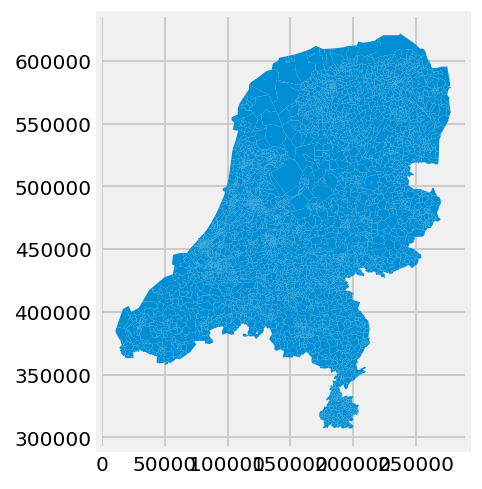

In [153]:
map_df_combined.plot()

In [154]:
#get data to map postal codes to gemeente code
df_gem_post=pd.read_csv(shapedir+'pc6hnr20170801_gwb.csv', sep=';')


In [177]:
df_gem_post.head()

PC6  Huisnummer  Buurt2017  Wijk2017  Gem2017   PC4     temp
0  1011AB         105    3630400     36304      363  1011  1011363
1  1011AB         106    3630400     36304      363  1011  1011363
2  1011AB         107    3630400     36304      363  1011  1011363
3  1011AB         110    3630400     36304      363  1011  1011363
4  1011AB         112    3630400     36304      363  1011  1011363

In [178]:
#unfortuneately this is only available as 6 digits so some wrangling is required
df_gem_post['PC4'] = df_gem_post['PC6'].str[:4]
df_gem_post['temp'] = df_gem_post['PC4'] + df_gem_post['Gem2017'].astype(str)
df_gem_post_uniques = df_gem_post.drop_duplicates(subset='temp')
df_gem_post_uniques = df_gem_post_uniques[['Gem2017','PC4']]

df_gem_post_uniques.sample(5, random_state=1)

Gem2017   PC4
3729533     1676  4317
6040529     1586  7137
5617855     1945  6572
5859632      274  6861
6540362      160  7771

In [179]:
#Ooops 3-digit Gem2017 does not come with a starting 0:
df_gem_post_uniques['Gem2017'] = df_gem_post_uniques['Gem2017'].astype(str).str.zfill(4)

In [180]:
df_gem_post_uniques.sample(5)

Gem2017   PC4
6026171    0294  7119
1014459    0361  1822
7316079    1680  9447
1433138    1916  2266
3165919    0344  3572

In [181]:
#merge to get unigues
df_gem_post_combined = pd.merge(map_df_gemeenten, df_gem_post_uniques, left_on=map_df_gemeenten['code'], right_on=df_gem_post_uniques['Gem2017'])

In [184]:
df_gem_post_combined.columns

Index(['key_0', 'id', 'gid', 'code', 'gemeentenaam', 'geometry', 'Gem2017',
       'PC4'],
      dtype='object')

In [183]:
#merge uniques with cbs data
map_df_combined_= pd.merge(map_df_combined, df_gem_post_combined, left_on=map_df_combined['PC4_x'], right_on=df_gem_post_combined['PC4'].astype(str))

In [185]:
type(map_df_combined_)

geopandas.geodataframe.GeoDataFrame

In [186]:
#cleaning up the dataframe, need to redefine as it does not inherit the Geopandas plotting essentials 
map_df_combined_= gpd.GeoDataFrame(map_df_combined_[[ 'Gem2017', 'PC4', 'id', 'gid',
       'gemeentenaam', 'geometry', 'OBJECTID', 'PC4_x',
       'Aantal_mul', 'Aantal_adr', 'Shape_Leng', 'Shape_Area',
        'INWONER', 'MAN', 'VROUW', 'INW_014', 'INW_1524', 'INW_2544',
       'INW_4564', 'INW_65PL', 'GEBOORTE', 'P_AUTOCHT', 'P_WALLOCH',
       'P_NWALLOCH', 'AANTAL_HH', 'TOTHH_EENP', 'TOTHH_MPZK', 'HH_EENOUD',
       'HH_TWEEOUD', 'GEM_HH_GR', 'WONING', 'WONVOOR45', 'WON_4564',
       'WON_6574', 'WON_7584', 'WON_8594', 'WON_9504', 'WON_0514', 'WON_1524',
       'WON_MRGEZ', 'G_GAS_WON', 'G_ELEK_WON', 'UITKMINAOW', 'OAD', 'STED']], 
                                   crs={'init': 'epsg:28992'})

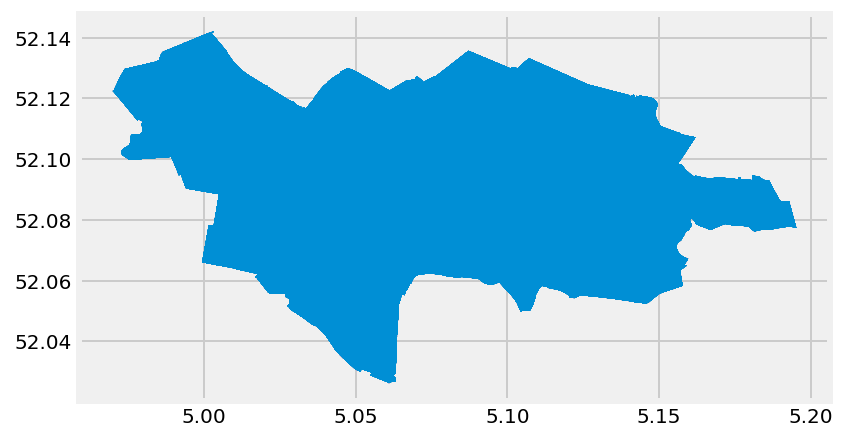

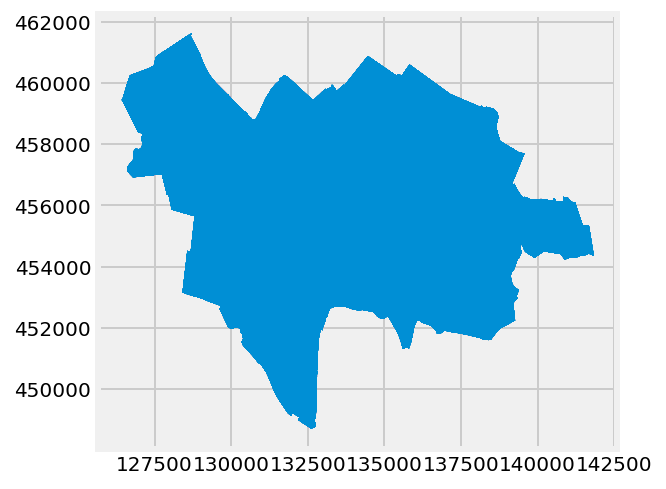

In [71]:
#check that the plotting still works
map_df_combined_.to_crs(epsg= 4326).loc[map_df_combined_['gemeentenaam']=='Utrecht'].plot()
map_df_combined_.loc[map_df_combined_['gemeentenaam']=='Utrecht'].plot()

In [165]:
#funnily enough a .copy() ...does 
map_df_combined_= map_df_combined_[[ 'Gem2017', 'PC4', 'id', 'gid',
       'gemeentenaam', 'geometry', 'OBJECTID', 'PC4_x',
       'Aantal_mul', 'Aantal_adr', 'Shape_Leng', 'Shape_Area',
        'INWONER', 'MAN', 'VROUW', 'INW_014', 'INW_1524', 'INW_2544',
       'INW_4564', 'INW_65PL', 'GEBOORTE', 'P_AUTOCHT', 'P_WALLOCH',
       'P_NWALLOCH', 'AANTAL_HH', 'TOTHH_EENP', 'TOTHH_MPZK', 'HH_EENOUD',
       'HH_TWEEOUD', 'GEM_HH_GR', 'WONING', 'WONVOOR45', 'WON_4564',
       'WON_6574', 'WON_7584', 'WON_8594', 'WON_9504', 'WON_0514', 'WON_1524',
       'WON_MRGEZ', 'G_GAS_WON', 'G_ELEK_WON', 'UITKMINAOW', 'OAD', 'STED']].copy()

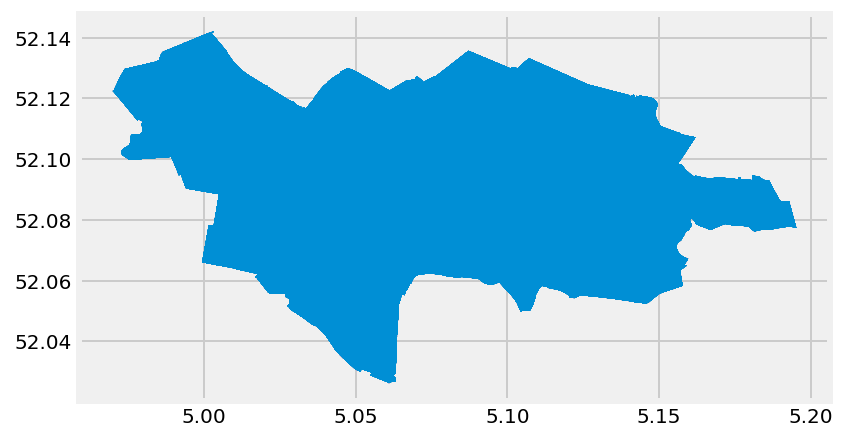

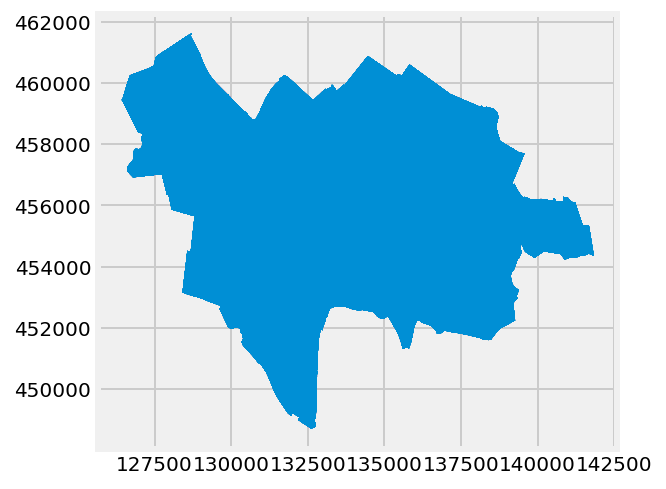

In [71]:
map_df_combined_.to_crs(epsg= 4326).loc[map_df_combined_['gemeentenaam']== 'Utrecht'].plot()
map_df_combined_.loc[map_df_combined_['gemeentenaam']== 'Utrecht'].plot()

In [187]:
map_df_combined_.sample(5)

Gem2017   PC4   id  gid      gemeentenaam  \
2763    1700  7693   11   23        Twenterand   
1373    0718  4388   56   48        Vlissingen   
1427    1714  4515  312  304             Sluis   
3185    0098  8481  226  226  Weststellingwerf   
2119    1711  6104  380  380     Echt-Susteren   

                                               geometry  OBJECTID PC4_x  \
2763  (POLYGON ((237241.811 496432.227, 237239.523 4...    2861.0  7693   
1373  (POLYGON ((28369.363 388401.833, 28375.656 388...    1466.0  4388   
1427  (POLYGON ((15286.84504189415 378673.1123249286...    1520.0  4515   
3185  (POLYGON ((190616.951 546019.2610000001, 19061...    3278.0  8481   
2119  (POLYGON ((184958.048 345173.85, 184987.48 345...    2204.0  6104   

      Aantal_mul  Aantal_adr    Shape_Leng    Shape_Area  INWONER   MAN  \
2763           1         691  21392.910721  1.221623e+07     1460   770   
1373           1        4881  10452.965940  2.876067e+06    10240  5045   
1427           1        1295  47093.164312  3.626923e+07     2285  1150   
3185           1          86  14341.708241  7.687861e+06      115    55   
2119           1         848  20717.718019  1.379425e+07     1665   845   

      VROUW  INW_014  INW_1524  INW_2544  INW_4564  INW_65PL  GEBOORTE  \
2763    690      275       195       325       440       225        15   
1373   5195     1745      1015      2405      2865      2215        90   
1427   1135      315       210       480       685       595        15   
3185     60       15        10        10        60        20    -99997   
2119    820      210       150       315       595       395        10   

      P_AUTOCHT  P_WALLOCH  P_NWALLOCH  AANTAL_HH  TOTHH_EENP  TOTHH_MPZK  \
2763         90          0           0        515         100         155   
1373         80         10          10       4585        1490        1450   
1427         80         20           0       1055         345         400   
3185         90     -99997      -99997         50          10          25   
2119         80         20           0        745         210         285   

      HH_EENOUD  HH_TWEEOUD  GEM_HH_GR  WONING  WONVOOR45  WON_4564  WON_6574  \
2763         35         220        2.8     500         50       140        85   
1373        400        1235        2.2    4710        760       995      1925   
1427         55         250        2.1    1175        360       245       140   
3185     -99997          15        2.4      65         40    -99997        10   
2119         50         195        2.2     775        185       195       145   

      WON_7584  WON_8594  WON_9504  WON_0514  WON_1524  WON_MRGEZ  G_GAS_WON  \
2763        85        55        40        45    -99997         20       1930   
1373       425       165       275       105        60        675       1210   
1427        85       175        95        60        20        105       1490   
3185         5    -99997        10    -99997    -99997     -99997       2120   
2119        70        95        70        20    -99997         25       1930   

      G_ELEK_WON  UITKMINAOW   OAD  STED  
2763        4080         135   140     5  
1373        2560         800  1564     2  
1427        2860         120   308     5  
3185        3440          10    14     5  
2119        3740         150   150     5

In [169]:
# Quick and dirty solution NA's
#map_df_combined_.loc[map_df_combined_.INWONER<0]=map_df_combined_.INWONER.loc[map_df_combined_.INWONER>0].mean()

In [188]:
#Calculate the hinhabitants per muncipality
df_gem_inwoners = map_df_combined_[['INWONER','Gem2017']].groupby(map_df_combined_['gemeentenaam']).sum().copy()

In [194]:
df_gem_inwoners.sort_values(by='INWONER', ascending=False).head(20)

INWONER
gemeentenaam             
Amsterdam          744853
's-Gravenhage      524800
Utrecht            344940
Rotterdam          234647
Tilburg            213810
Breda              182170
Nijmegen           174030
Haarlem            166945
Arnhem             161395
Apeldoorn          160050
Enschede           158135
Amersfoort         154330
Zaanstad           153660
's-Hertogenbosch   152460
Eindhoven          126853
Zwolle             125560
Zoetermeer         124750
Leiden             123640
Maastricht         122640
Dordrecht          118650

In [204]:
type(map_df_gem_)

geopandas.geodataframe.GeoDataFrame

In [203]:
#Get the unique geometries
map_df_gem_ = map_df_combined_[['Gem2017', 'PC4', 'id', 'gid', 'gemeentenaam', 'geometry']].drop_duplicates(subset='gemeentenaam')

In [207]:
#merge with population
map_df_gem_inw = pd.merge(map_df_gem_, df_gem_inwoners, left_on=map_df_gem_['gemeentenaam'],
                          right_on=df_gem_inwoners.index)

In [211]:
map_df_gem_inw.head()

key_0 Gem2017   PC4   id   gid    gemeentenaam  \
0       Amsterdam    0363  1011  157   147       Amsterdam   
1          Diemen    0384  1111  254   351          Diemen   
2    Ouder-Amstel    0437  1114   82    85    Ouder-Amstel   
3  Haarlemmermeer    0394  1117  334  3094  Haarlemmermeer   
4       Landsmeer    0415  1121  235   251       Landsmeer   

                                            geometry  INWONER  
0  (POLYGON ((124538.015 481367.148, 124552.225 4...   744853  
1  (POLYGON ((125384.51 483664.215, 125409.346 48...    27270  
2  (POLYGON ((121710.83 479065.55, 121710.384 479...    13415  
3  (POLYGON ((106893.731 489382.143, 106702.708 4...    62293  
4  (POLYGON ((121637.679 495491.919, 121635.209 4...    11265

In [212]:
#get the area per 'gemeente'
map_df_gem_inw['area'] = map_df_gem_inw['geometry'].map(lambda p: p.area / 10**6)

In [ ]:
#et the population density
map_df_gem_inw['dens'] = map_df_gem_inw['INWONER']/map_df_gem_inw['area']

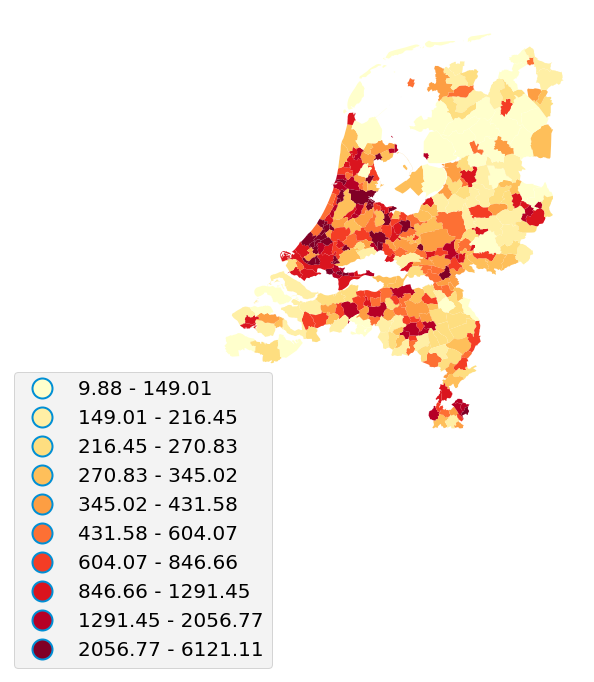

<Figure size 1440x1440 with 0 Axes>

In [410]:
#plot the density
ax = plt.axes()

ax.axis('off')

plt.figure(figsize=(20,20))
map_df_gem_inw.loc[map_df_gem_inw['INWONER']>0].plot(column='dens', 
                cmap='YlOrRd',#'tab20', 
                label=map_df_gem_inw['dens'], 
                scheme='quantiles',
                legend=True,
                k=10,
                ax=ax)
leg = ax.get_legend();
leg.set_bbox_to_anchor((0., 0., 0.2, 0.2));


## Nifty stuff
### Distance between to points

Loads of intresting stuff at :
https://shapely.readthedocs.io/en/stable/manual.html

In [511]:
#Define 2 points
from shapely.geometry import Point, LineString

p1 = Point(df_prov_caps.x[3], df_prov_caps.y[3])
p2 = Point(df_prov_caps.x[10], df_prov_caps.y[10])
print(df_prov_caps.iloc[:,0],)

#Determine distance
dist = p1.distance(p2)

#print nicely
place1 = df_prov_caps['Naam'][3]
place2 = df_prov_caps['Naam'][10]
print(f'Distance between {place1} and {place2}: {round(dist/1000,2)} kilometers')

0        Haarlem
1       Den Haag
2     Middelburg
3      Den Bosch
4     Maastricht
5         Arnhem
6         Zwolle
7          Assen
8     Groningen 
9     Leeuwarden
10      Lelystad
11       Utrecht
Name: Naam, dtype: object
Distance between Den Bosch and Lelystad: 90.19 kilometers


In [512]:
#plot and annotate on a map

#create geomertic line
AB = LineString([p1, p2])

In [513]:
AB.wkt

'LINESTRING (144826.0265972544 413481.8698372486, 148402.3113092899 503596.6709185987)'

In [514]:
type(AB)

shapely.geometry.linestring.LineString

In [515]:
xy=(x[0],y[0])
xy

(144826.02659725436, 413481.86983724864)

In [516]:
#because it is a shapely geometry a centroid can be determined
AB.centroid.x

146614.16895327214

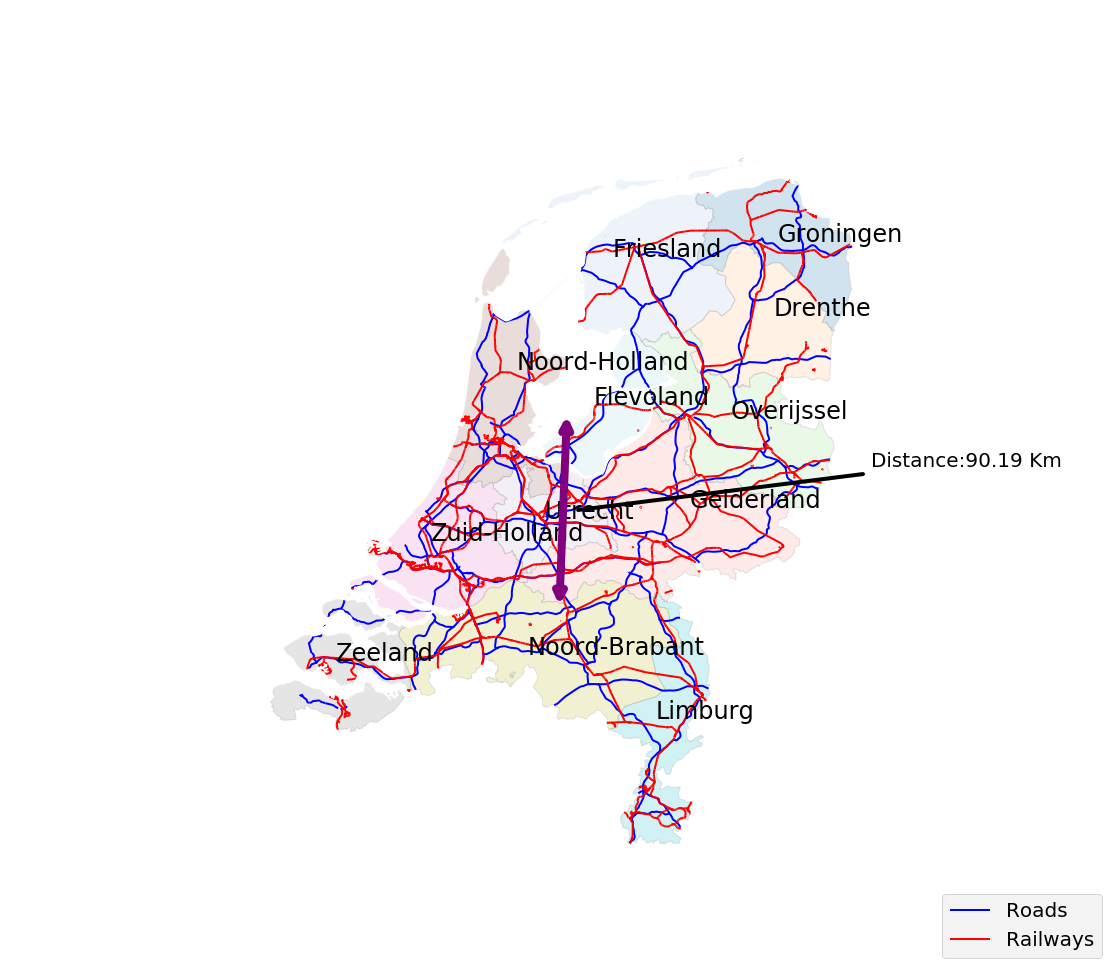

In [528]:
texts = []
plt.figure(figsize=(8,8)) 
ax = plt.axes()
ax.axis('off')
map_df_provincies.plot(cmap='tab20',ax=ax, facecolor='white', edgecolor='grey', alpha=.2)
map_df_kustlijn.plot(edgecolor='white', facecolor='white',ax=ax, zorder=3)
map_df_roads.loc[map_df_roads['BEHEERDER']=='R'].plot(lw=1, color='blue', ax=ax, label='Roads')
map_df_rail.loc[map_df_rail['typespoorb']=='trein'].plot(lw=1, color='r',ax=ax, label='Railways')
for x, y, label in zip(map_df_provincies_points.geometry.x, map_df_provincies_points.geometry.y, map_df_provincies_points['provincienaam']):
    texts.append(plt.text(x, y, label, fontsize = 12, weight='medium'))
x, y = AB.xy

# The arrow is actually an arrow of an empty annotation
plt.annotate(s=f'', 
             xy=(x[0],y[0]), 
             xytext=(x[1],y[1]), 
             arrowprops=dict(arrowstyle='<->', 
                             linewidth=4, 
                             color='purple'))

# Annotate the arrow from the centroid
plt.annotate(s=f'Distance:{round(p1.distance(p2)/1000,2)} Km', 
             xy=(AB.centroid.x+5000, AB.centroid.y), 
             xytext=(AB.centroid.x+140000, AB.centroid.y+20000), 
             arrowprops=dict(arrowstyle='-',
                             linewidth=2, 
                             color='black'))

plt.legend(bbox_to_anchor=(1.05, 0), loc=2, borderaxespad=0.5);

### Distance matrix

In [541]:
from scipy.spatial import distance_matrix

#create a df with just x and y
s= df_prov_caps['geometry']
#extract x and y from geometry
df_prov_caps['x'] = s.apply(lambda p: p.x)
df_prov_caps['y'] = s.apply(lambda p: p.y)

df = df_prov_caps[['x','y','Naam']]

# reset the index
df= df.set_index('Naam', drop=True)

#https://stackoverflow.com/questions/29481485/creating-a-distance-matrix

In [536]:
df.head(2)

x              y
Naam                                 
Haarlem   99358.071532  488328.629513
Den Haag  75658.983231  454155.958898

In [537]:
#plain version 
matrix = pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)

In [538]:
#rounde to  kilometers
round((pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)/1000),2)

Naam        Haarlem  Den Haag  Middelburg  Den Bosch  Maastricht  Arnhem  \
Naam                                                                       
Haarlem        0.00     41.59      119.25      87.57      185.37   95.36   
Den Haag      41.59      0.00       77.68      80.24      166.99  109.38   
Middelburg   119.25     77.68        0.00     117.35      160.56  164.38   
Den Bosch     87.57     80.24      117.35       0.00       99.47   51.36   
Maastricht   185.37    166.99      160.56      99.47        0.00  128.62   
Arnhem        95.36    109.38      164.38      51.36      128.62    0.00   
Zwolle       100.31    132.20      202.29     104.17      186.74   58.53   
Assen        144.80    182.64      257.04     164.29      243.93  117.64   
Groningen    159.70    199.41      275.50     188.26      270.21  143.14   
Leeuwarden   120.64    162.04      239.65     169.24      261.57  133.64   
Lelystad      51.37     87.95      163.28      90.19      187.28   68.24   
Utrecht       41.87     48.69      113.88      46.05      145.00   61.03   

Naam        Zwolle   Assen  Groningen   Leeuwarden  Lelystad  Utrecht  
Naam                                                                   
Haarlem     100.31  144.80      159.70      120.64     51.37    41.87  
Den Haag    132.20  182.64      199.41      162.04     87.95    48.69  
Middelburg  202.29  257.04      275.50      239.65    163.28   113.88  
Den Bosch   104.17  164.29      188.26      169.24     90.19    46.05  
Maastricht  186.74  243.93      270.21      261.57    187.28   145.00  
Arnhem       58.53  117.64      143.14      133.64     68.24    61.03  
Zwolle        0.00   60.15       84.87       79.23     50.24    88.42  
Assen        60.15    0.00       26.74       54.69     94.70   144.24  
Groningen    84.87   26.74        0.00       50.16    112.23   164.60  
Leeuwarden   79.23   54.69       50.16        0.00     81.51   135.88  
Lelystad     50.24   94.70      112.23       81.51      0.00    54.47  
Utrecht      88.42  144.24      164.60      135.88     54.47     0.00

In [533]:
round((matrix/1000),2)

Naam        Haarlem  Den Haag  Middelburg  Den Bosch  Maastricht  Arnhem  \
Naam                                                                       
Haarlem        0.00     41.59      119.25      87.57      185.37   95.36   
Den Haag      41.59      0.00       77.68      80.24      166.99  109.38   
Middelburg   119.25     77.68        0.00     117.35      160.56  164.38   
Den Bosch     87.57     80.24      117.35       0.00       99.47   51.36   
Maastricht   185.37    166.99      160.56      99.47        0.00  128.62   
Arnhem        95.36    109.38      164.38      51.36      128.62    0.00   
Zwolle       100.31    132.20      202.29     104.17      186.74   58.53   
Assen        144.80    182.64      257.04     164.29      243.93  117.64   
Groningen    159.70    199.41      275.50     188.26      270.21  143.14   
Leeuwarden   120.64    162.04      239.65     169.24      261.57  133.64   
Lelystad      51.37     87.95      163.28      90.19      187.28   68.24   
Utrecht       41.87     48.69      113.88      46.05      145.00   61.03   

Naam        Zwolle   Assen  Groningen   Leeuwarden  Lelystad  Utrecht  
Naam                                                                   
Haarlem     100.31  144.80      159.70      120.64     51.37    41.87  
Den Haag    132.20  182.64      199.41      162.04     87.95    48.69  
Middelburg  202.29  257.04      275.50      239.65    163.28   113.88  
Den Bosch   104.17  164.29      188.26      169.24     90.19    46.05  
Maastricht  186.74  243.93      270.21      261.57    187.28   145.00  
Arnhem       58.53  117.64      143.14      133.64     68.24    61.03  
Zwolle        0.00   60.15       84.87       79.23     50.24    88.42  
Assen        60.15    0.00       26.74       54.69     94.70   144.24  
Groningen    84.87   26.74        0.00       50.16    112.23   164.60  
Leeuwarden   79.23   54.69       50.16        0.00     81.51   135.88  
Lelystad     50.24   94.70      112.23       81.51      0.00    54.47  
Utrecht      88.42  144.24      164.60      135.88     54.47     0.00

# Appendix

In [395]:
map_df_natural=gpd.read_file(shapedir+'natural.shp')


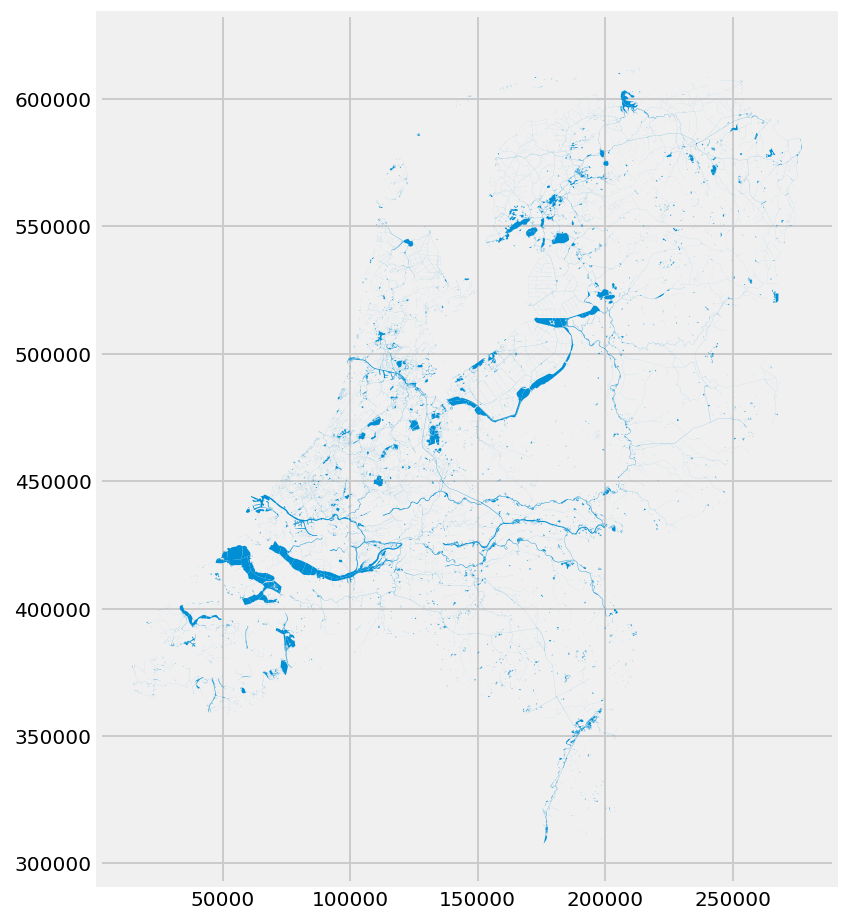

In [396]:
fig, ax = plt.subplots(1,figsize=(8,8))
# map_df.plot(ax=ax, facecolor='white', edgecolor='grey', alpha=.5)
map_df_natural.to_crs(epsg= 28992).loc[map_df_natural['type']=='water'].plot(ax=ax)

In [540]:
map_df_natural.sample(10)

osm_id              name    type  \
29024  36861792              None   water   
9369    6296661  Benderse Plassen   water   
27209  30156548              None   water   
17313   6324813              None  forest   
27979  32127459              None  forest   
1004    6283775              None   water   
4941    6289820              None   water   
3502    6287223              None   water   
3323    6286917     Wejde Giessen   water   
18020   6326085              None  forest   

                                                geometry  
29024  POLYGON ((6.5054575 53.203731, 6.5052946 53.20...  
9369   POLYGON ((6.3974 52.7891, 6.3969 52.7893, 6.39...  
27209  POLYGON ((4.3192083 51.9853592, 4.3198098 51.9...  
17313  POLYGON ((5.1583 51.9288, 5.1578 51.9289, 5.15...  
27979  POLYGON ((5.1919587 52.2542487, 5.1920188 52.2...  
1004   POLYGON ((5.7806 51.3838, 5.7803 51.3841, 5.78...  
4941   POLYGON ((4.3183428 52.0246764, 4.3182 52.0245...  
3502   POLYGON ((5.3428 51.8535, 5.3424 51.854, 5.342...  
3323   POLYGON ((4.86724 51.83506, 4.8668956 51.83469...  
18020  POLYGON ((5.2316 52.2371, 5.2311 52.2374, 5.23...

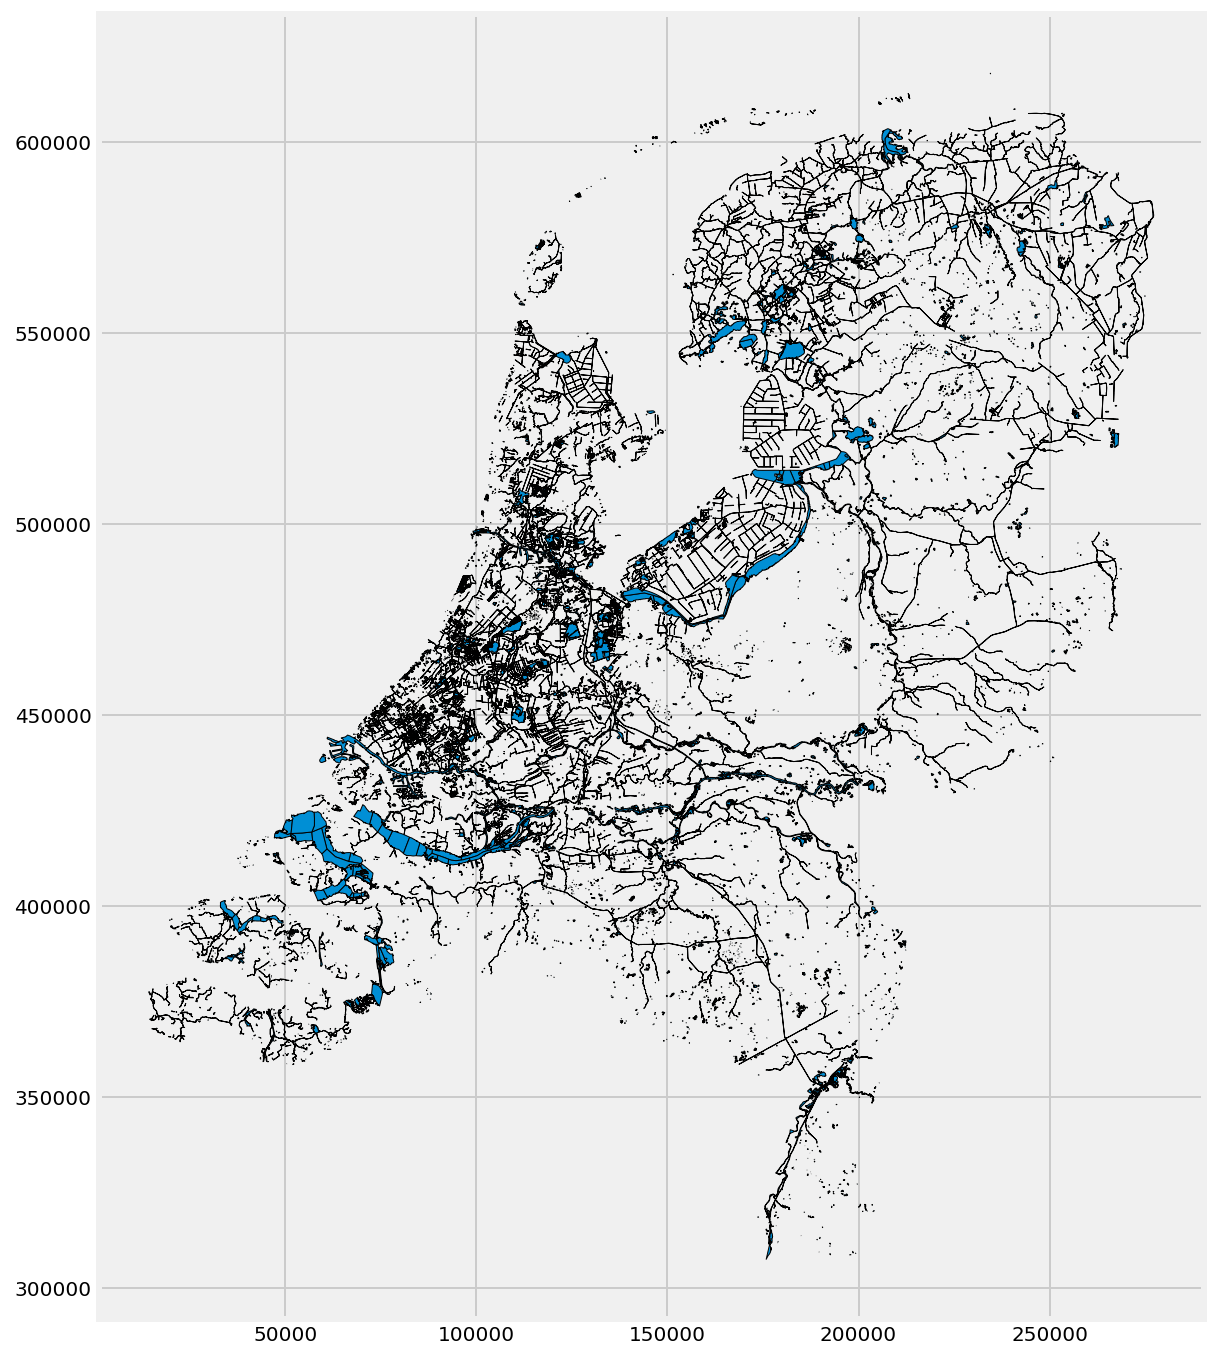

In [162]:
map_df_natural.to_crs(epsg= 28992).loc[map_df_natural['type']=='water'].plot(figsize=(20,12), edgecolor='black')

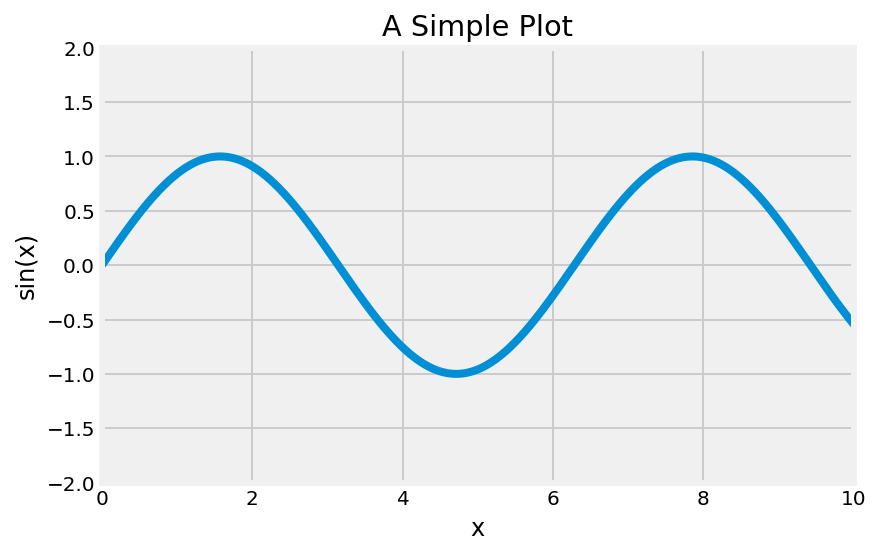

In [495]:
#https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html
import numpy as np
# MATPLOTLIB GOTCHAS
# While most plt functions translate directly to ax methods (such as plt.plot() → ax.plot(), plt.legend() → ax.legend(), etc.), this is not the case for all commands. In particular, functions to set limits, labels, and titles are slightly modified. For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

# plt.xlabel() → ax.set_xlabel()

# plt.ylabel() → ax.set_ylabel()

# plt.xlim() → ax.set_xlim()

# plt.ylim() → ax.set_ylim()

# plt.title() → ax.set_title()

# In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the ax.set() method to set all these properties at once (Figure 4-19):
x = np.linspace(0, 10, 1000)
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
           xlabel='x', ylabel='sin(x)',
           title='A Simple Plot');

In [544]:
point = Point(1, 1)
line = LineString([(2, 0), (2, 4), (3, 4)])
point.hausdorff_distance(line)

# point.distance(Point(3, 4))


3.605551275463989

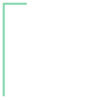

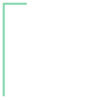